In [2]:
# # terminal de instalação
# # !pip install numpy
# !pip install python-magic-bin
# !pip uninstall matplotlib seaborn -y
# !pip install matplotlib seaborn
# !pip install --upgrade pip
# !pip install ninja
# !pip install matplotlib --force-reinstall --no-binary :all:
# !pip install seaborn
# !pip install meson
# !pip uninstall matplotlib seaborn -y
# !pip install matplotlib seaborn
# !pip install pandas
# !pip install ibge
# !pip install sidrapy
# !pip install scikit-learn
!pip install neuralforecast
# !pip freeze > requirements.txt

INFO: pip is looking at multiple versions of neuralforecast to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of neuralforecast to determine which version is compatible with other requirements. This could take a while.
INFO: This is taking longer than usual. You might need to provide the dependency resolver with stricter constraints to reduce runtime. See https://pip.pypa.io/warnings/backtracking for guidance. If you want to abort this run, press Ctrl + C.
     ---------------------------------------- 0.0/2.7 MB ? eta -:--:--
     ---------------------------------------- 2.7/2.7 MB 17.7 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [24 lines of output]
      Traceback (most recent call last):
        File "c:\Users\aureziano\Desktop\Codigos\python\mestrado\data_health\.venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 353, in <module>
          main()
          ~~~~^^
        File "c:\Users\aureziano\Desktop\Codigos\python\mestrado\data_health\.venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 335, in main
          json_out['return_val'] = hook(**hook_input['kwargs'])
                                   ~~~~^^^^^^^^^^^^^^^^^^^^^^^^
        File "c:\Users\aureziano\Desktop\Codigos\python\mestrado\data_health\.venv\Lib\site-packages\pip\_vendor\pyproject_hooks\_in_process\_in_process.py", line 118, in get_requires_for_build_wheel
          return hook(config_settings)
        File "C:\Users\aureziano\AppData\Local\Temp

# Requeiments

In [1]:
import os
import pandas as pd
import seaborn as sn
import numpy as np
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import requests
import sidrapy
from ibge.localidades import *

# Importando os dados da base WSUS

### Documentação das variáveis


### Variaveis identificadas na documentação

- TP_NOT: Tipo de Notificação [varchar(1)] # Valor Constante

        1 – Negativa

        2 – Individual

        3 – Surto

        4 – Agregado 

- TP_NOT.1: Tipo de Notificação  - 2 - Individual [varchar(1)] # Valor Constante

- ID_AGRAVO: Identificação de Agravo/Doença (CID) [varchar2(4)] # Valor Constante

- DT_NOTIFIC: Data da Notificação [date] # Ano mais importante

- NU_ANO: Ano da Notificação [varchar(4)]

- SG_UF_NOT: SG ? UF do Estado de Notificação [varchar(2)]

- ID_MUNICIP: Id de identificação do Municipio [varchar(6)]

- ID_REGIONA: Código da regional de saúde da tabela de município do sistema [varchar2(4)]

- ID_UNIDADE: Códigos e nomes de estabelecimento [varchar(7)] # sem necessidade

- DT_DIAG: Data do inicio do tratamento [date]

- SEM_DIAG: Semana epidemiológica do diagnóstico do caso notificado [varchar(6)]

- ANO_NASC: Ano de Nascimento [date]

- NU_IDADE_N: Idade, com Código (4 - Ano e 0 para completar) A composição da variável obedece o seguinte critério: 1° dígito: Ex: 3009 – nove meses, 4018 – dezoito anos  [number(4)]

        1. Hora

        2. Dia

        3. Mês

        4. Ano
        
- CS_SEXO: Sexo [varchar(1)]

        0. Masculino

        1. Feminino

- CS_GESTANT: Código Gestante [varchar2(1)] # Não usar
        1. 1ºTrimestre 

        2. 2ºTrimestre 

        3. 3ºTrimestre

        4. Idade gestacional Ignorada 

        5. Não 

        6. Não se aplica

        9. Ignorado
        
- CS_RACA: Código Raça [varchar2(1)]

        1. Branca 

        2. Preta 

        3. Amarela

        4. Parda 

        5. Indígena 

        9. Ignorado

- CS_ESCOL_N: Código Escolaridade [varchar2(2)]

        0. Analfabeto 

        1. 1ª a 4ª série incompleta do EF (antigo primário ou 1º grau) 

        2. 4ª série completa do EF (antigo primário ou 1º grau)

        3. 5ª à 8ª série incompleta do EF (antigo ginásio ou 1º grau) 

        4. Ensino fundamental completo (antigo ginásio ou 1º grau) 

        5. Ensino médio incompleto (antigo colegial ou 2º grau )

        6. Ensino médio completo (antigo colegial ou 2º grau ) 

        7. Educação superior incompleta 

        8. Educação superior completa 

        9. Ignorado 

        10. Não se aplica

- SG_UF: Código do Estado Notificante  [varchar(2)]

- ID_MN_RESI: Código do município de residência do caso notificado  [varchar2(6)]

- ID_RG_RESI: Regional de saúde onde está localizado o município de residência do paciente por ocasião da notificação [varchar2(4)]

- ID_PAIS: País onde residia o paciente por ocasião da notificação  [varchar(4)]

- NDUPLIC_N: Identifica duplicidade  [varchar2(1)]

        0 ou branco – Não identificado

        1 – Não é duplicidade (nãolistar)

        2 – Duplicidade (não contar) 

- DT_DIGITA: Data de digitação [date]

- DT_TRANSUS: Data de transferência da unidade de saúde [date]

- DT_TRANSDM: Data de transferência do distrito municipal [date]

- DT_TRANSSM: Data de transferência da secretaria municipal de saúde [date]

- DT_TRANSRM: Data de transferência da regional municipal [date] # Valor Constante

- DT_TRANSRS: Data de transferência da regional de saúde [date]

- DT_TRANSSE: Data de transferência da secretaria estadual de saúde [date]

- NU_LOTE_V: Identifica o Lote da transferência da notificação um nível do sistema para outro

- NU_LOTE_H: Identifica do Lote da transferência de registros dentro de um mesmo nível do sistema

- CS_FLXRET: Identifica se o registro está habilitado ou foi enviado pelo fluxo de retorno para o município de residência # Valor Constante

        0 - Não

        1 - habilitado para envio.

        2 - enviado 

- FLXRECEBI: Identifica se o registro foi recebido pelo fluxo de retorno [varchar2(1)] # Valor Constante

- MIGRADO_W: Identifica se o registro é oriundo da rotina de migração da base Windows. [varchar2(1)]

        1. migrado do Sinan Windows 

- ID_OCUPA_N: Ocupação do indivíduo que sofreu o agravo [varchar2(6)]

- NU_LESOES:  Nº de lesões cutâneas [numeric(2)]

- FORMACLINI: [varchar(1)] 

        1- I -Indeterminada

        2- T - Tuberculóide

        3- D - Dimorfa

        4- V - Virchowiana

        5- Não classificado

- AVALIA_N: Avaliação do Grau de Incapacidade Física no Diagnóstico [varchar(1)]

        0 Grau zero

        1- Grau I

        2- Grau II

        3 - Não avaliado

- CLASSOPERA: Classificação operacional, por ocasião do diagnóstico, para eleição do esquema terapêutico [varchar(1)]

        1- PB - Paucibacilar

        2- MB - Multibacilar

- MODOENTR: Modo de entrada do paciente no sistema [varchar(1)]

        1- Caso novo

        2- Transferencia do mesmo município (outra unidade)

        3- Transferência de outro município (mesma UF)

        4- Transferência de outro estado

        5- Transferencia de outro país

        6- Recidiva

        7- Outros reingressos

        9- Ignorado

- MODODETECT: Modo de detecção do caso novo [varchar(1)]

        1- Encaminhamento

        2- Demanda espontânea

        3- Exame de coletividade

        4- Exame de contatos

        5- Outros modos

        9- Ignorado

- BACILOSCOP: Informar o resultado da baciloscopia [varchar(1)]

        1. Positiva

        2. Negativa

        3. Não realizada

        9. Ignorado

- DTINICTRAT: Data do inicio do tratamento [date]

- ESQ_INI_N: Esquema terapêutico instituído por ocasião do diagnostico [varchar(1)]

        1. PQT/ PB/ 6 doses

        2. PQT/ MB/ 12 doses

        3. Outros Esquemas Substitutos

- CONTREG: Número de pessoas que residam ou tenham residido, nos últimos 5 anos com o doente, a contar da Data do diagnóstico [numeric(2)]

- NERVOSAFET: Número de nervos afetados [numeric(2)]

- UFATUAL : Código da UF do cadastro do IBGE [varchar(2)] # Valor Constante

- ID_MUNI_AT :Código e nome dos municípios do cadastro do IBGE [varchar(6)]

- DT_NOTI_AT: Data de notificação atual [date]

- ID_UNID_AT: Códigos e nomes de estabelecimentos de saúde (CNES) [varchar(7)]

- UFRESAT: Sigla da UF de residência atual do paciente [varchar(2)]

- MUNIRESAT: código IBGE do município de residência atual do paciente [varchar(6)]

- DTULTCOMP: Data do último comparecimento [date]

- CLASSATUAL: Classificação operacional atual [varchar(1)]

        1. PB (Paucibacilar) 

        2. MB (Multibacilar) 

- AVAL_ATU_N: Avaliação de incapacidade física no momento da cura - [varchar(1)]

        0. grau zero

        1. grau I

        2. grau II

        3. Não avaliado

        9- Ignorado

- ESQ_ATU_N: Esquema terapêutico em uso [varchar(1)]

        1- PQT/PB/06 doses

        2- PQT/MB/12 doses

        3- Outros Esquemas Substitutivos

- DOSE_RECEB: Número de doses supervisionadas [numeric(2)]

- EPIS_RACIO: Episódio Reacional Durante o Tratamento [varchar(1)]

        1- Reação tipo 1

        2- Reação tipo 2

        3- Reação tipo 1 e 2

- DTMUDESQ:  Data de mudança do Esquema [date]

- CONTEXAM: Número de contatos examinados [numeric(2)]

- DTALTA_N: Data da alta [date]

- TPALTA_N: Tipo de Saída [varchar(1)]

        1- Cura

        2- transf. p/ mesmo município

        3- transf. p/ outro município

        4- transf. p/ outro Estado

        5- transf. p/ outro país

        6- Óbito

        7- Abandono

        8- Erro diagnóstico

        9- transf. não especificada

- IN_VINCULA: Vinculação [varchar(1)]

        0 - Não Vinculada

        1 - Vinculada
        
- NU_LOTE_IA: Transferência vertical da investigação e do acompanhamento [varchar(7)]

### Obtando os dados

In [72]:
# Path dos arquivos a serem analisados
# path_csv = "C:\Users\aureziano\Desktop\Data\HANSENÍASE"
path_csv = os.path.join("C:\\","Users","aureziano","Desktop","Data","HANSENÍASE")
path_csv

'C:\\Users\\aureziano\\Desktop\\Data\\HANSENÍASE'

### Montando o DataFrame

In [73]:
# Lista para armazenar os DataFrames
dataframes = []

# Iterar pelos arquivos na pasta
for file in os.listdir(path_csv):
    if file.startswith("HANSBR") and file.endswith(".csv"):  # Agora verificamos por arquivos CSV
        file_path = os.path.join(path_csv, file)  # Caminho completo do arquivo
        try:
            # Tentar carregar como CSV
            df = pd.read_csv(file_path, encoding='utf-8', low_memory=False)  # Use 'utf-8' se os dados forem codificados em UTF-8
            dataframes.append(df)
        except Exception as e:
            print(f"Erro ao processar {file}: {e}")

# Combinar todos os DataFrames em um único (opcional)
if dataframes:
    combined_df = pd.concat(dataframes, ignore_index=True)
    # print(combined_df.head())
else:
    print("Nenhum arquivo foi carregado.")

df_dados = pd.DataFrame(combined_df)    
df_dados.head()  

TP_NOT  TP_NOT.1  ID_AGRAVO  DT_NOTIFIC  NU_ANO  SG_UF_NOT  ID_MUNICIP  \
0      2         2          0    20010110    2001         41      410304   
1      2         2          0    20010117    2001         41      410940   
2      2         2          0    20010116    2001         41      410940   
3      2         2          0    20010108    2001         41      411780   
4      2         2          0    20010102    2001         41      411780   

   ID_REGIONA  ID_UNIDADE   DT_DIAG  ...  AVAL_ATU_N  ESQ_ATU_N  DOSE_RECEB  \
0        1359     2741474  20001210  ...           0          3           0   
1        1359     2741369  20001223  ...           0          3           0   
2        1359     2741369  20010116  ...           0          1           0   
3        1359     2743116  20010108  ...           0          3           0   
4        1359     2743116  20000111  ...           2          3           0   

   EPIS_RACIO  DTMUDESQ  CONTEXAM  DTALTA_N  TPALTA_N  IN_VINCULA  NU_LOTE_IA  
0           0         0         0  20021002         1           0           0  
1           0         0         2  20011219         1           0           0  
2           0         0         1  20010627         1           0           0  
3           0         0         3  20020128         1           0           0  
4           0         0         0  20020314         1           0           0  

[5 rows x 64 columns]

In [74]:

df_dados['NU_ANO']

0             2001
1             2001
2             2001
3             2001
4             2001
            ...   
961301        2024
961302        2024
961303        2024
961304        2024
961305    14441240
Name: NU_ANO, Length: 961306, dtype: int64

### Retirar a linha de Total

In [75]:
# Remover as linhas onde TP_NOT é 'Total'
df_dados = combined_df[combined_df['TP_NOT'] != 'Total']
print(f"DataFrame atualizado com {df_dados.shape[0]} linhas.")

DataFrame atualizado com 961282 linhas.


### Retirar duplicadas pela váriavel NDUPLIC_N

In [76]:
# Filtrar o DataFrame excluindo as linhas com NDUPLIC_N == 2
df_dados = df_dados[df_dados["NDUPLIC_N"] != 2]

print("Linhas com NDUPLIC_N == 2 foram removidas.")
print(f"DataFrame atualizado com {df_dados.shape[0]} linhas.")

Linhas com NDUPLIC_N == 2 foram removidas.
DataFrame atualizado com 961157 linhas.


### Colunas com valor constante

In [77]:
# Verificar colunas com valor constante e seus valores
colunas_constantes = {col: df_dados[col].iloc[0] for col in df_dados.columns if df_dados[col].nunique() == 1}

if colunas_constantes:
    print("Colunas com valor constante e seus respectivos valores:")
    for coluna, valor in colunas_constantes.items():
        print(f"{coluna}: {valor}")
else:
    print("Não há colunas com valores constantes no DataFrame.")


Colunas com valor constante e seus respectivos valores:
TP_NOT: 2
TP_NOT.1: 2
ID_AGRAVO: 0
DT_TRANSRM: 0
CS_FLXRET: 0
FLXRECEBI: 0
UFATUAL: 0


### Retirar as colunas com valor constante

In [78]:
# Dropar as colunas com valor constante
df_dados = df_dados.drop(columns=colunas_constantes)

print(f"Colunas removidas: {colunas_constantes}")
print(f"DataFrame atualizado com {df_dados.shape[1]} colunas.")

Colunas removidas: {'TP_NOT': '2', 'TP_NOT.1': np.int64(2), 'ID_AGRAVO': np.int64(0), 'DT_TRANSRM': np.int64(0), 'CS_FLXRET': np.int64(0), 'FLXRECEBI': np.int64(0), 'UFATUAL': np.int64(0)}
DataFrame atualizado com 57 colunas.


In [79]:
### Investigação de variaveis
# Obter os valores únicos
valores_unicos = df_dados["NU_LOTE_IA"].unique()
print(valores_unicos)

[      0 2007002 2007001 2007005 2007003 2007004 2007014 2007010 2007008
 2007006 2007009 2007015 2021030 2020046 2020020 2021011 2022001 2022013
 2021018 2020044 2022033 2021043 2022003 2021017 2022041 2020025 2023004
 2020008 2020047 2020032 2022015 2021007 2023008 2020040 2022050 2022053
 2021051 2020016 2021032 2023010 2022036 2021022 2022019 2022016 2022004
 2021050 2022028 2021012 2021010 2021015 2021039 2022032 2022010 2021034
 2021016 2023018 2021028 2021056 2021035 2022031 2020009 2020039 2023003
 2020026 2021024 2020037 2020030 2023006 2020043 2021008 2023012 2020050
 2021009 2021002 2020029 2021004 2021025 2022051 2022039 2022042 2022011
 2020049 2021026 2021045 2021072 2021003 2021042 2021013 2021023 2020091
 2021006 2021021 2023005 2023016 2021014 2022038 2023001 2020061 2021041
 2022020 2022005 2020038 2022030 2020031 2023013 2020010 2021052 2021005
 2021001 2021068 2020042 2021038 2022022 2022021 2020033 2022006 2021037
 2022002 2021033 2022017 2022034 2021027 2023020 20

#### Transformando a coluna NU_IDADE_N para obter apenas os ultimos 2 digitos

In [80]:
# Filtrar valores com 4 dígitos
quatro_digitos = df_dados["ANO_NASC"].astype(str).str.match(r"^\d{4}$")

# Contar quantos atendem a essa condição
qtd_quatro_digitos = quatro_digitos.sum()

print(f"Quantidade de valores com 4 dígitos: {qtd_quatro_digitos}")

# Filtrar valores que não possuem 4 dígitos
nao_quatro_digitos = ~df_dados["ANO_NASC"].astype(str).str.match(r"^\d{4}$")

# Contar quantos atendem a essa condição
qtd_nao_quatro_digitos = nao_quatro_digitos.sum()

print(f"Quantidade de valores que não têm 4 dígitos: {qtd_nao_quatro_digitos}")

Quantidade de valores com 4 dígitos: 944967
Quantidade de valores que não têm 4 dígitos: 16190


In [81]:
# Converter a coluna para string, extrair os últimos dois dígitos e convertê-los de volta para número
df_dados["NU_IDADE_N"] = df_dados["NU_IDADE_N"].astype(str).str[-2:].astype(int)

# Visualizar os dados transformados
df_dados["NU_IDADE_N"]

0         58
1         44
2         32
3         40
4         31
          ..
961300    57
961301    21
961302    44
961303    17
961304    17
Name: NU_IDADE_N, Length: 961157, dtype: int64

### Drop das variveis sobrando apenas as relevantes

In [82]:
colunas_eliminadas = {"NDUPLIC_N",
                      "ID_UNIDADECS_GESTANT",
                        "SEM_DIAG",
                        "SG_UF",
                        "CS_ESCOL_N",
                        "ID_MN_RESI",
                        "ID_RG_RESI",
                        "ID_PAIS",
                        "NDUPLIC_N",
                        "DT_DIGITA",
                        "DT_TRANSUS",
                        "DT_TRANSDM",
                        "DT_TRANSSM",
                        "DT_TRANSRS",
                        "DT_TRANSSE",
                        "NU_LOTE_V",
                        "NU_LOTE_H",
                        "MIGRADO_W",
                        "ID_OCUPA_N",
                        "IN_VINCULA",
                        "NU_LOTE_IA"
                    }

colunas_eliminadas

{'CS_ESCOL_N',
 'DT_DIGITA',
 'DT_TRANSDM',
 'DT_TRANSRS',
 'DT_TRANSSE',
 'DT_TRANSSM',
 'DT_TRANSUS',
 'ID_MN_RESI',
 'ID_OCUPA_N',
 'ID_PAIS',
 'ID_RG_RESI',
 'ID_UNIDADECS_GESTANT',
 'IN_VINCULA',
 'MIGRADO_W',
 'NDUPLIC_N',
 'NU_LOTE_H',
 'NU_LOTE_IA',
 'NU_LOTE_V',
 'SEM_DIAG',
 'SG_UF'}

In [83]:
# Dropar as colunas especificadas
df_dados = df_dados.drop(columns=colunas_eliminadas, errors='ignore')

print(f"As colunas {colunas_eliminadas} foram removidas.")
print(f"O DataFrame agora tem {df_dados.shape[1]} colunas.")

As colunas {'SEM_DIAG', 'ID_OCUPA_N', 'NU_LOTE_H', 'NU_LOTE_V', 'DT_DIGITA', 'NU_LOTE_IA', 'DT_TRANSUS', 'CS_ESCOL_N', 'DT_TRANSSE', 'DT_TRANSSM', 'SG_UF', 'ID_MN_RESI', 'ID_RG_RESI', 'DT_TRANSRS', 'ID_PAIS', 'DT_TRANSDM', 'NDUPLIC_N', 'IN_VINCULA', 'ID_UNIDADECS_GESTANT', 'MIGRADO_W'} foram removidas.
O DataFrame agora tem 38 colunas.


### Variaveis possivelmente importantes


In [84]:
# TPALTA_N : Tipo de Saída (1- Cura; 6- Óbito; 7- Abandono)

### Colunas numericas

In [85]:
# Selecionar colunas numéricas
numeric_df = df_dados.select_dtypes(include=['number'])

# Calcular a correlação
correlation = numeric_df.corr()
correlation

DT_NOTIFIC    NU_ANO  SG_UF_NOT  ID_MUNICIP  ID_REGIONA  \
DT_NOTIFIC    1.000000  0.999987   0.038621    0.038591    0.069776   
NU_ANO        0.999987  1.000000   0.038525    0.038495    0.069785   
SG_UF_NOT     0.038621  0.038525   1.000000    0.999950    0.084642   
ID_MUNICIP    0.038591  0.038495   0.999950    1.000000    0.084520   
ID_REGIONA    0.069776  0.069785   0.084642    0.084520    1.000000   
ID_UNIDADE    0.317621  0.317576   0.018673    0.018570    0.038708   
DT_DIAG       0.987485  0.987442   0.037536    0.037493    0.070352   
ANO_NASC     -0.071941 -0.071959   0.014362    0.014092    0.004055   
NU_IDADE_N    0.149727  0.149676   0.086708    0.087218    0.000090   
CS_SEXO       0.001015  0.001006   0.000286    0.000281   -0.001550   
CS_GESTANT   -0.447485 -0.447463  -0.018675   -0.018615   -0.039870   
CS_RACA       0.206047  0.206004  -0.125629   -0.126334    0.027334   
NU_LESOES     0.158885  0.158811   0.017435    0.017854   -0.006155   
FORMACLINI    0.154458  0.154368   0.058171    0.058435    0.006906   
AVALIA_N      0.037757  0.037763   0.021872    0.021976   -0.007030   
CLASSOPERA    0.164505  0.164456   0.057654    0.057838    0.009148   
MODOENTR      0.130313  0.130341   0.001339    0.001430   -0.000704   
MODODETECT   -0.057905 -0.057906   0.011854    0.011701    0.009137   
BACILOSCOP    0.243644  0.243530   0.015105    0.014876    0.021073   
DTINICTRAT    0.097116  0.097109  -0.035004   -0.034870    0.000003   
ESQ_INI_N     0.049570  0.049569   0.062055    0.062359    0.001488   
CONTREG       0.003842  0.003807  -0.064802   -0.064842    0.003122   
NERVOSAFET    0.345424  0.345359   0.111748    0.111877    0.022985   
ID_MUNI_AT    0.038644  0.038547   0.991522    0.991591    0.083531   
DT_NOTI_AT    0.070311  0.070306  -0.032830   -0.032706   -0.001025   
ID_UNID_AT    0.319956  0.319910   0.013495    0.013395    0.040969   
UFRESAT       0.035336  0.035242   0.973037    0.973047    0.082434   
MUNIRESAT     0.031215  0.031121   0.961731    0.961837    0.081367   
DTULTCOMP     0.054328  0.054319  -0.026173   -0.026068   -0.004265   
CLASSATUAL    0.167547  0.167499   0.060440    0.060629    0.012012   
AVAL_ATU_N   -0.208793 -0.208753  -0.015246   -0.015169   -0.016152   
ESQ_ATU_N     0.102806  0.102768   0.080945    0.081369    0.002664   
DOSE_RECEB    0.461889  0.461778   0.051226    0.051446    0.037319   
EPIS_RACIO    0.410464  0.410399   0.056440    0.056212    0.012313   
DTMUDESQ      0.075404  0.075373   0.061777    0.062090   -0.020428   
CONTEXAM      0.090336  0.090311  -0.008645   -0.008577    0.017677   
DTALTA_N     -0.307062 -0.306994  -0.039958   -0.040040    0.000865   
TPALTA_N     -0.066979 -0.066972  -0.001393   -0.001517   -0.002224   

            ID_UNIDADE   DT_DIAG  ANO_NASC  NU_IDADE_N   CS_SEXO  ...  \
DT_NOTIFIC    0.317621  0.987485 -0.071941    0.149727  0.001015  ...   
NU_ANO        0.317576  0.987442 -0.071959    0.149676  0.001006  ...   
SG_UF_NOT     0.018673  0.037536  0.014362    0.086708  0.000286  ...   
ID_MUNICIP    0.018570  0.037493  0.014092    0.087218  0.000281  ...   
ID_REGIONA    0.038708  0.070352  0.004055    0.000090 -0.001550  ...   
ID_UNIDADE    1.000000  0.313371 -0.029592    0.041414  0.000666  ...   
DT_DIAG       0.313371  1.000000 -0.067565    0.151086  0.001009  ...   
ANO_NASC     -0.029592 -0.067565  1.000000   -0.084699  0.000144  ...   
NU_IDADE_N    0.041414  0.151086 -0.084699    1.000000  0.000244  ...   
CS_SEXO       0.000666  0.001009  0.000144    0.000244  1.000000  ...   
CS_GESTANT   -0.144348 -0.442009  0.004200   -0.054239 -0.001006  ...   
CS_RACA       0.046874  0.203951 -0.016453   -0.041979 -0.000431  ...   
NU_LESOES     0.033283  0.157491 -0.011491    0.104395 -0.000057  ...   
FORMACLINI    0.037735  0.150237 -0.007460    0.146888 -0.001373  ...   
AVALIA_N      0.001372  0.034093 -0.016659    0.124436  0.000383  ...   
CLASSOPERA    0.055135  0.159081 -0.014524    0.154584  0.000608  ...   
M

In [86]:
numeric_df.columns

Index(['DT_NOTIFIC', 'NU_ANO', 'SG_UF_NOT', 'ID_MUNICIP', 'ID_REGIONA',
       'ID_UNIDADE', 'DT_DIAG', 'ANO_NASC', 'NU_IDADE_N', 'CS_SEXO',
       'CS_GESTANT', 'CS_RACA', 'NU_LESOES', 'FORMACLINI', 'AVALIA_N',
       'CLASSOPERA', 'MODOENTR', 'MODODETECT', 'BACILOSCOP', 'DTINICTRAT',
       'ESQ_INI_N', 'CONTREG', 'NERVOSAFET', 'ID_MUNI_AT', 'DT_NOTI_AT',
       'ID_UNID_AT', 'UFRESAT', 'MUNIRESAT', 'DTULTCOMP', 'CLASSATUAL',
       'AVAL_ATU_N', 'ESQ_ATU_N', 'DOSE_RECEB', 'EPIS_RACIO', 'DTMUDESQ',
       'CONTEXAM', 'DTALTA_N', 'TPALTA_N'],
      dtype='object')

### Correlação

In [16]:
# Iremos dropar (retirar) a coluna ID, pois ela não é relevante para a análise de correlação
'''
    Entre 0 — 0.2 Correlação muito fraca
    Entre 0.2-0.4 Fraca
    Entre 0.4-0.6 Moderada
    Entre 0.6-0.8 Forte
    Entre 0.8-1.0 Muito forte
'''
numeric_df.corr("spearman")

# Heatmap
plt.figure(figsize = (100,100))
sns.heatmap(numeric_df.corr("spearman"), annot = True, cmap = "YlGnBu")
plt.title("Mapa de Correlação das Variáveis Numéricas\n", fontsize = 15)
plt.show()

# Analises Graficas

## Ocorrências de casos

### Notificações por Mês

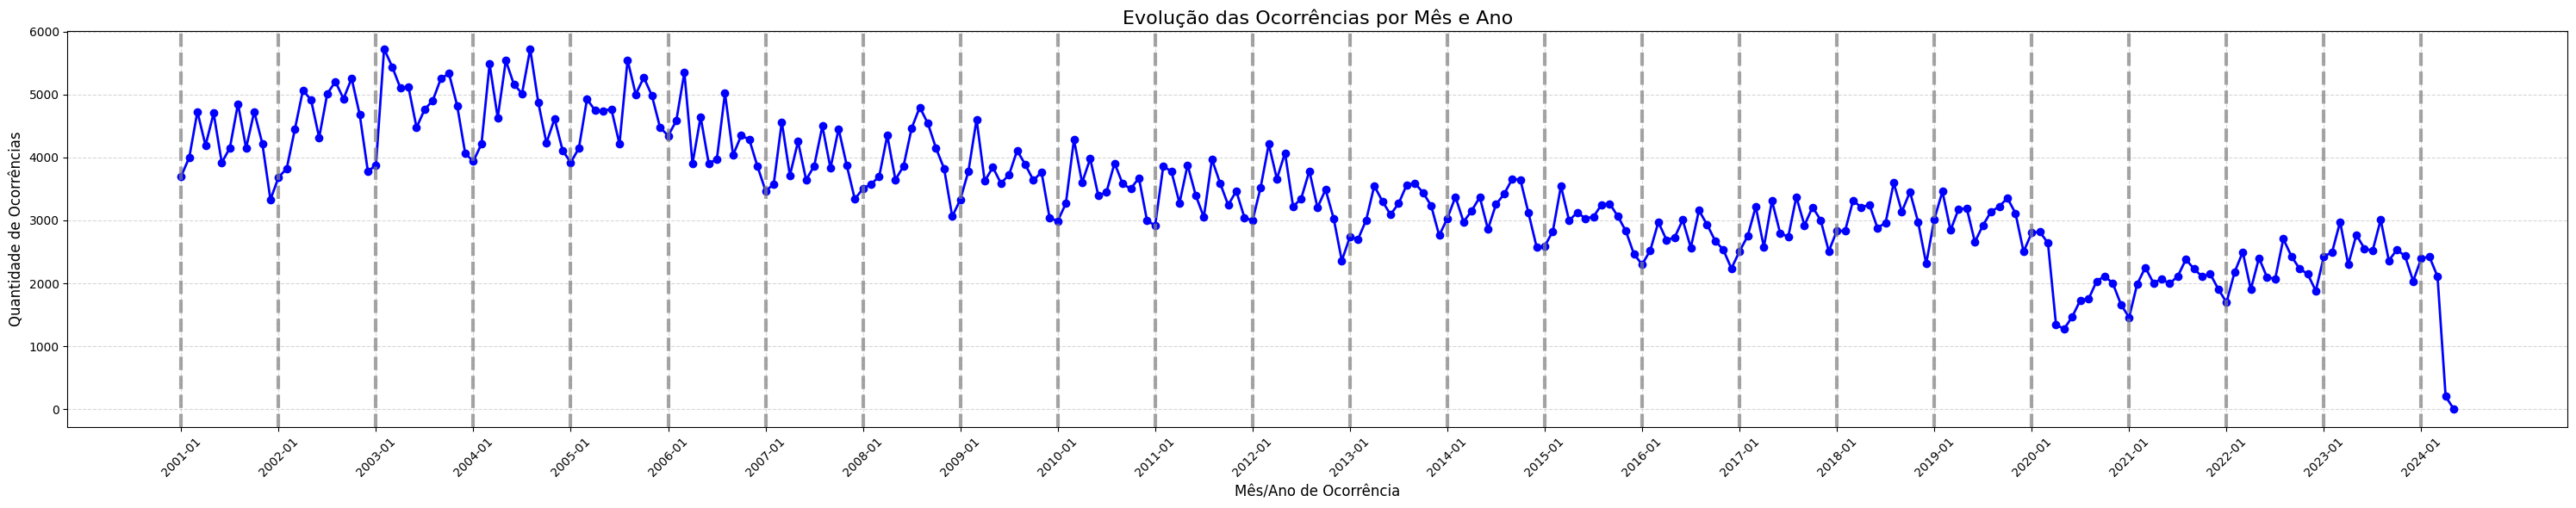

In [38]:
# Converter a coluna DT_NOTIFIC para datetime
df_dados["DT_NOTIFIC"] = pd.to_datetime(df_dados["DT_NOTIFIC"], format='%Y%m%d', errors='coerce')

# Criar uma nova coluna no formato "AAAA-MM"
df_dados["ANO_MES"] = df_dados["DT_NOTIFIC"].dt.to_period("M").astype(str)

# Agrupar os dados por "ANO_MES" e contar a quantidade de ocorrências
dados_agrupados = df_dados.groupby("ANO_MES").size().reset_index(name="quantidade")

# Detectar mudanças de ano para adicionar linhas verticais
dados_agrupados["ANO"] = dados_agrupados["ANO_MES"].str[:4]
anos_unicos = dados_agrupados["ANO"].drop_duplicates().index

# Plotar o gráfico de linha com todos os pontos
fig, ax = plt.subplots(figsize=(30, 6))

ax.plot(
    dados_agrupados["ANO_MES"],
    dados_agrupados["quantidade"],
    marker='o',
    linestyle='-',
    linewidth=2,
    color='b'
)

# Configurar título e rótulos dos eixos
ax.set_title("Evolução das Ocorrências por Mês e Ano", fontsize=16)
ax.set_xlabel("Mês/Ano de Ocorrência", fontsize=12)
ax.set_ylabel("Quantidade de Ocorrências", fontsize=12)

# Ajustar os ticks (marcadores) do eixo X para exibir de 6 em 6 meses (somente legenda)
xticks = dados_agrupados["ANO_MES"][::12]  # Seleciona a cada 6 meses
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)

# Adicionar linhas verticais nos inícios de cada ano
for ano_idx in anos_unicos:
    ax.axvline(x=ano_idx, color='gray', linestyle='--', linewidth=3, alpha=0.7)

# Exibir grid para melhor visualização
plt.grid(True, linestyle='--', alpha=0.5)

# Ajustar a disposição do layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


### Notificações por Ano

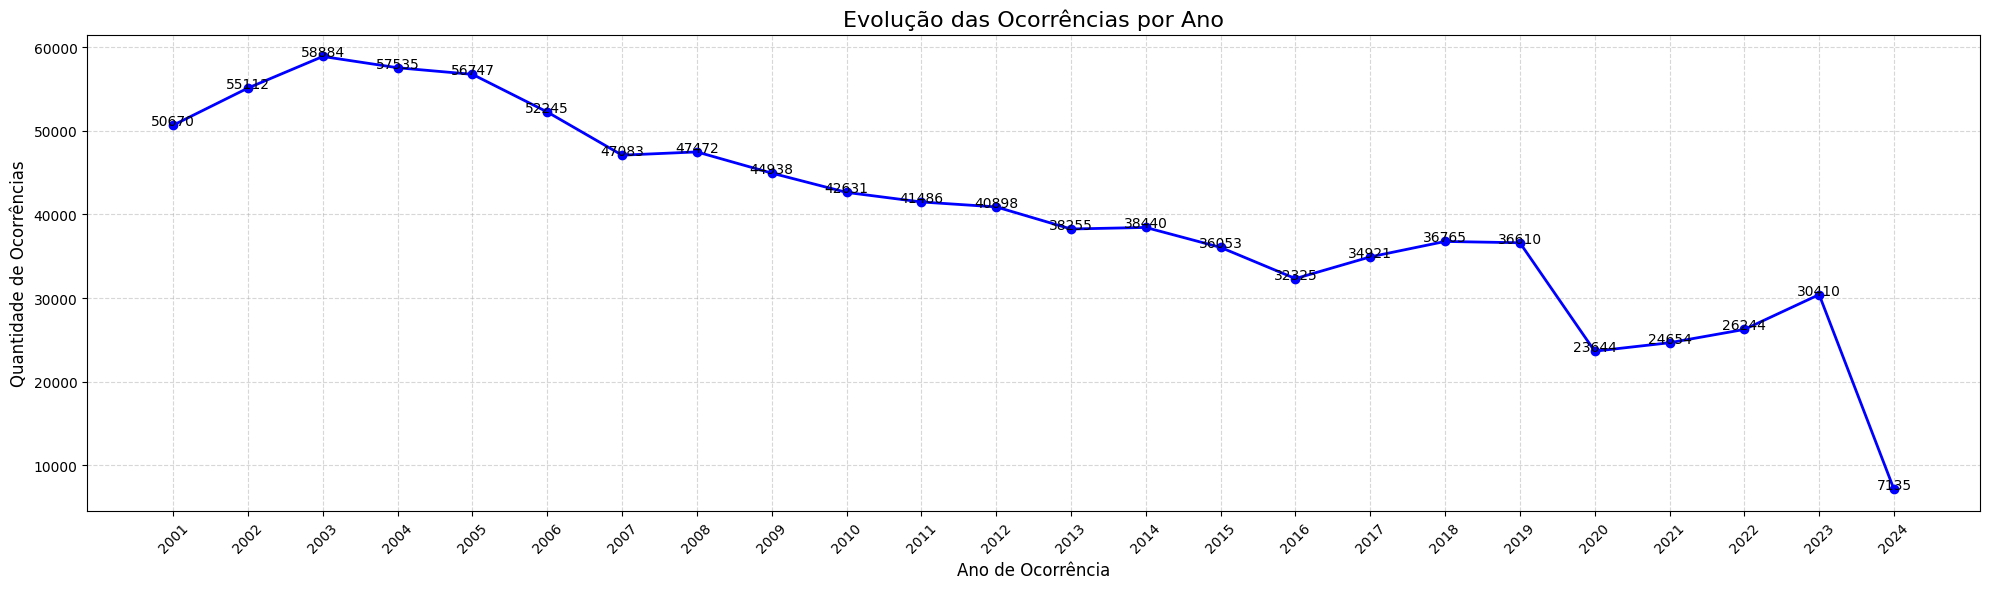

In [41]:
# Agrupar os dados por ano e contar a quantidade de ocorrências
dados_agrupados = df_dados.groupby("NU_ANO").size().reset_index(name="quantidade")

# Plotar o gráfico de linha com os anos no eixo X e a quantidade no eixo Y
fig, ax = plt.subplots(figsize=(20, 6))

ax.plot(
    dados_agrupados["NU_ANO"],
    dados_agrupados["quantidade"],
    marker='o',
    linestyle='-',
    linewidth=2,
    color='b'
)

# Configurar título e rótulos dos eixos
ax.set_title("Evolução das Ocorrências por Ano", fontsize=16)
ax.set_xlabel("Ano de Ocorrência", fontsize=12)
ax.set_ylabel("Quantidade de Ocorrências", fontsize=12)

# Adicionar rótulos nos pontos
for i, txt in enumerate(dados_agrupados["quantidade"]):
    ax.annotate(txt, (dados_agrupados["NU_ANO"][i], dados_agrupados["quantidade"][i]), fontsize=10, ha='center')

# Melhorar a aparência do gráfico
plt.xticks(dados_agrupados["NU_ANO"], rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Exibir o gráfico
plt.tight_layout()
plt.show()

### Notificação por Estado

In [42]:
# Busco as informações dos estados
dados_estados = Estados()
if isinstance(dados_estados.json_ibge, (list, dict)):
    dt_est = dados_estados.json_ibge  # Já é uma estrutura Python válida
    print(dt_est)
else:
    dt_est = json.loads(dados_estados.json_ibge)  # Caso seja uma string JSON
    print(dt_est)
dt_est[0]

[{'id': 11, 'sigla': 'RO', 'nome': 'Rondônia', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}, {'id': 12, 'sigla': 'AC', 'nome': 'Acre', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}, {'id': 13, 'sigla': 'AM', 'nome': 'Amazonas', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}, {'id': 14, 'sigla': 'RR', 'nome': 'Roraima', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}, {'id': 15, 'sigla': 'PA', 'nome': 'Pará', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}, {'id': 16, 'sigla': 'AP', 'nome': 'Amapá', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}, {'id': 17, 'sigla': 'TO', 'nome': 'Tocantins', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}, {'id': 21, 'sigla': 'MA', 'nome': 'Maranhão', 'regiao': {'id': 2, 'sigla': 'NE', 'nome': 'Nordeste'}}, {'id': 22, 'sigla': 'PI', 'nome': 'Piauí', 'regiao': {'id': 2, 'sigla': 'NE', 'nome': 'Nordeste'}}, {'id': 23, 'sigla': 'CE', 'nome': 'Ceará', 'regiao': {'id': 2, 'sigla': 'NE', 'nome': 'Nordeste'}}, {'id': 24, 'si

{'id': 11,
 'sigla': 'RO',
 'nome': 'Rondônia',
 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}

In [49]:
# Extraindo corretamente as informações de estado e região
dados_est = []
for dado in dt_est:
    linha = {
        "id": dado["id"],
        "sigla": dado["sigla"],
        "nome": dado["nome"],
        "regiao": dado["regiao"]["nome"]  # Acessa o nome da região corretamente
    }
    dados_est.append(linha)

# Criar DataFrame com as informações de estados e regiões
df_estados = pd.DataFrame(dados_est)  
print(df_estados.head())



   id sigla      nome regiao
0  11    RO  Rondônia  Norte
1  12    AC      Acre  Norte
2  13    AM  Amazonas  Norte
3  14    RR   Roraima  Norte
4  15    PA      Pará  Norte


### Casos por Estado (Separado por Região)

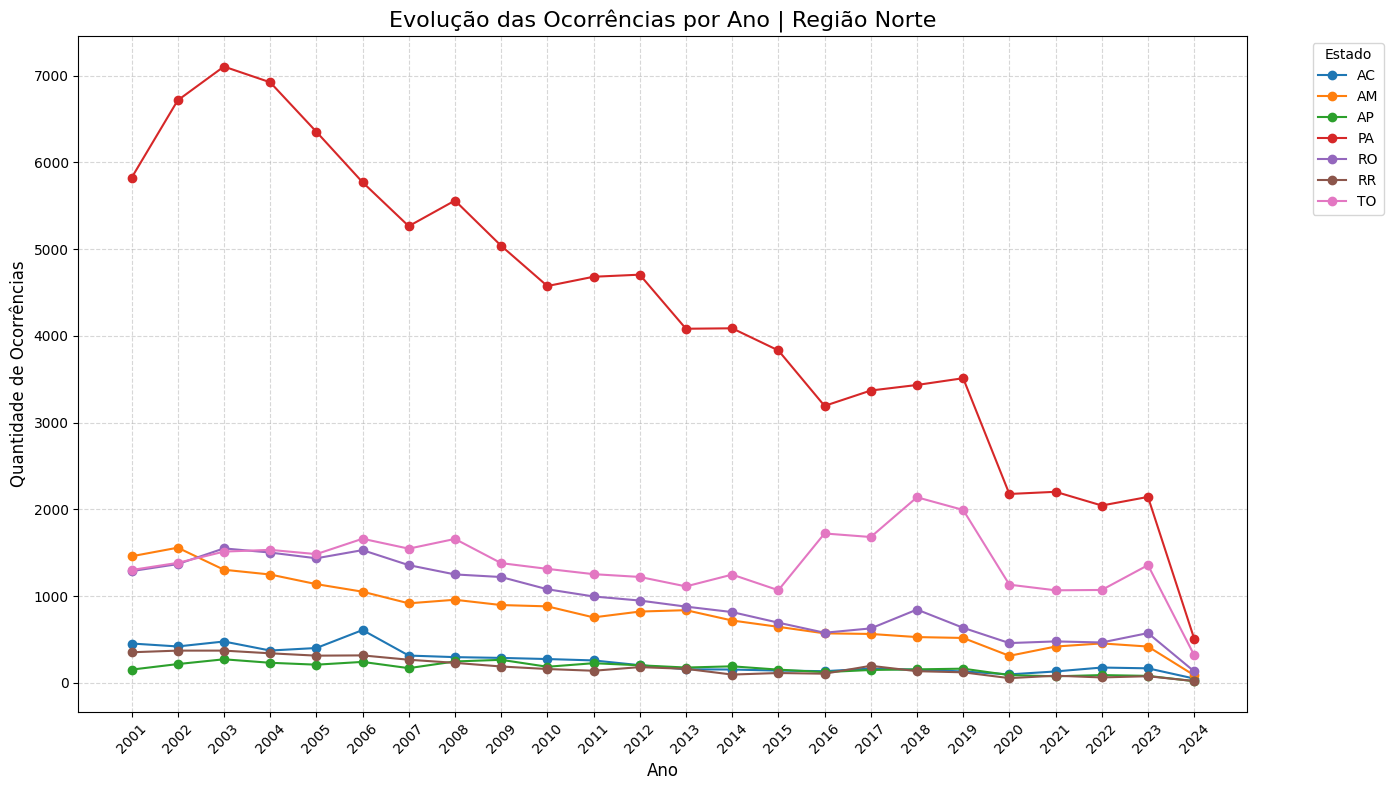

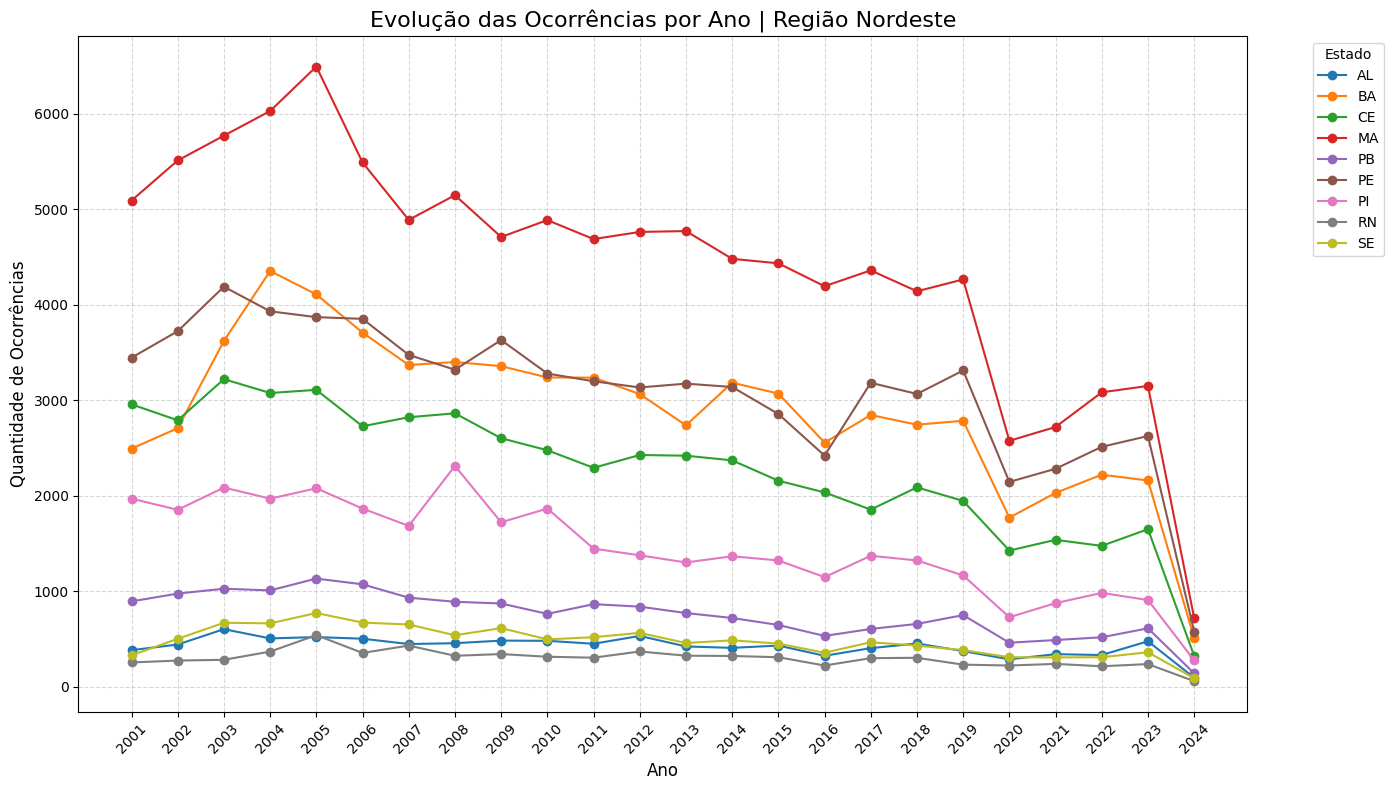

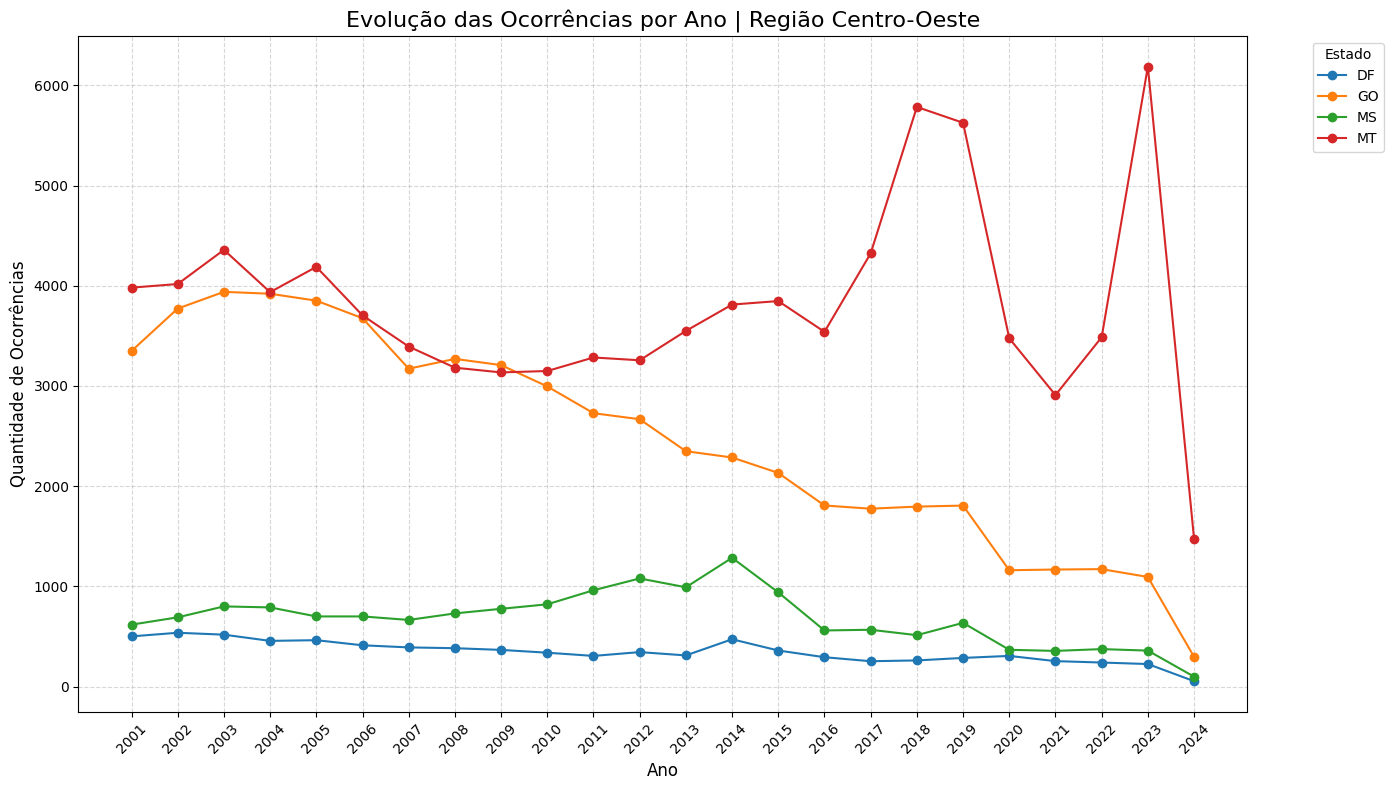

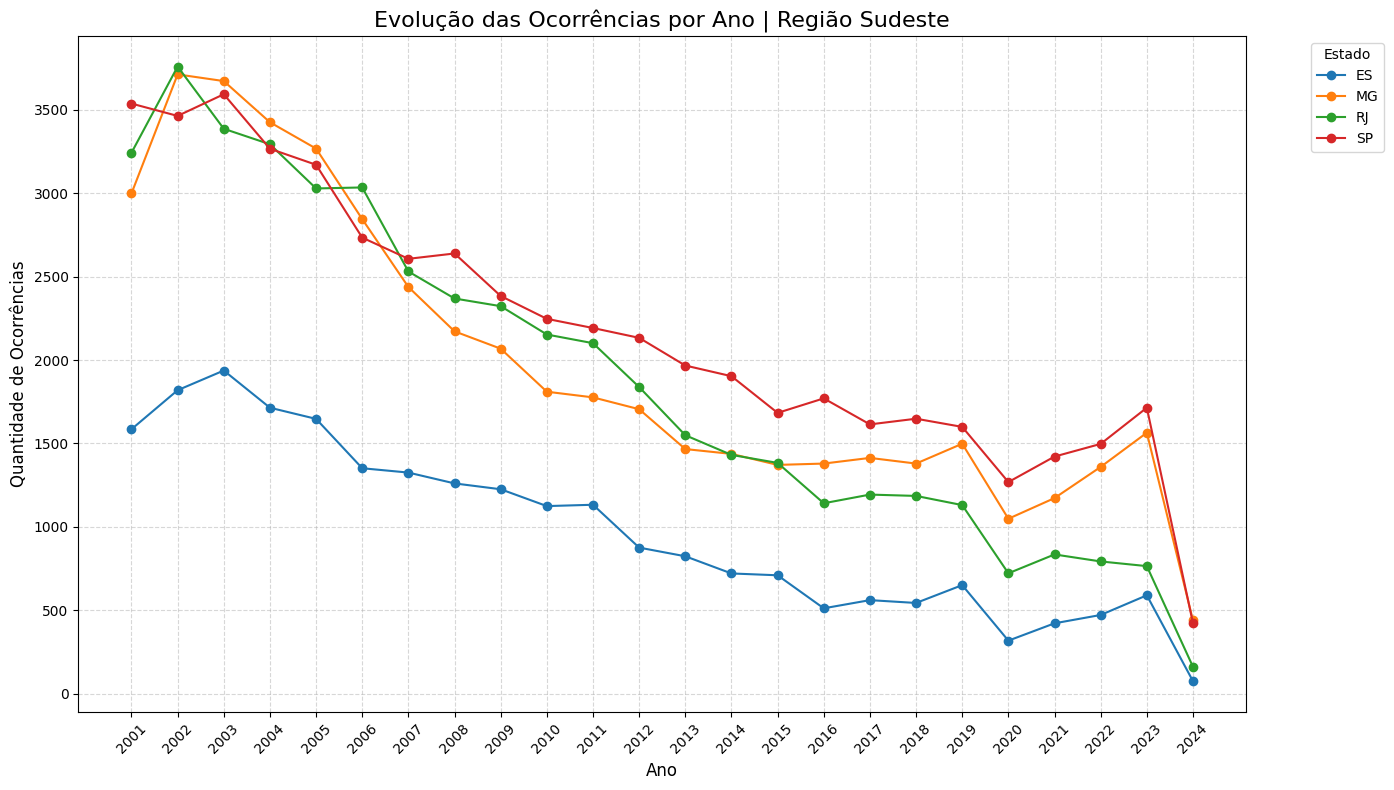

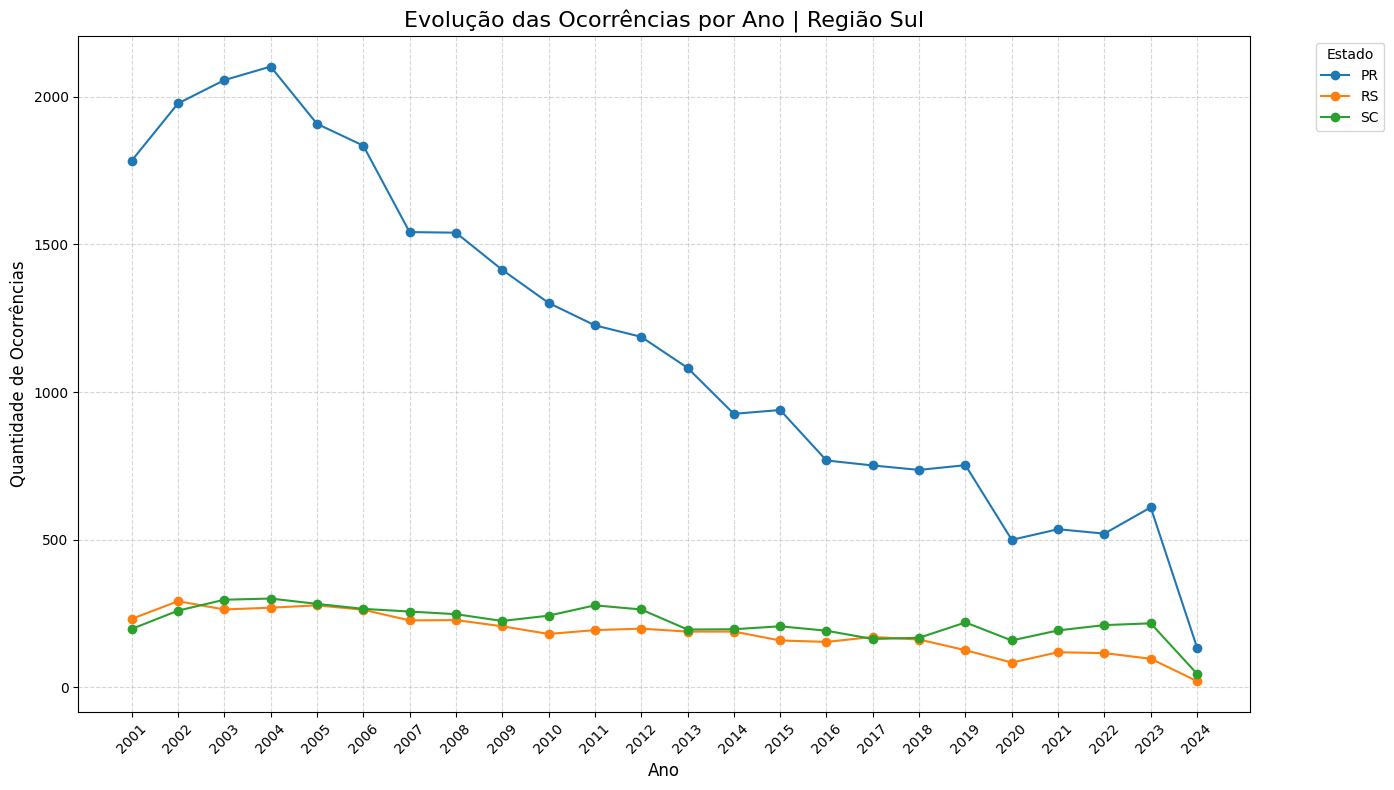

In [51]:
# Criar DataFrame de estados
df_estados = pd.DataFrame(dados_est)

# Adicionar ao DataFrame original uma coluna para os nomes dos estados e regiões
df_dados_estado = df_dados.merge(df_estados[['id', 'sigla', 'regiao']], left_on='SG_UF_NOT', right_on='id', how='left')

# Agrupar por ano, estado e região
dados_agrupados = df_dados_estado.groupby(['NU_ANO', 'sigla', 'regiao']).size().reset_index(name='quantidade')

# Obter lista única de regiões
regioes = dados_agrupados['regiao'].unique()

# Criar gráficos de linha para cada região
for regiao in regioes:
    fig, ax = plt.subplots(figsize=(14, 8))

    dados_regiao = dados_agrupados[dados_agrupados['regiao'] == regiao]

    for estado in dados_regiao['sigla'].unique():
        dados_estado = dados_regiao[dados_regiao['sigla'] == estado]
        ax.plot(
            dados_estado['NU_ANO'],
            dados_estado['quantidade'],
            marker='o',
            label=estado
        )

    # Configurar títulos e rótulos
    ax.set_title(f'Evolução das Ocorrências por Ano | Região {regiao}', fontsize=16)
    ax.set_xlabel('Ano', fontsize=12)
    ax.set_ylabel('Quantidade de Ocorrências', fontsize=12)

    # Melhorar a visualização
    plt.xticks(dados_agrupados['NU_ANO'].unique(), rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    ax.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()

    # Exibir o gráfico para a região atual
    plt.show()


### Por Região

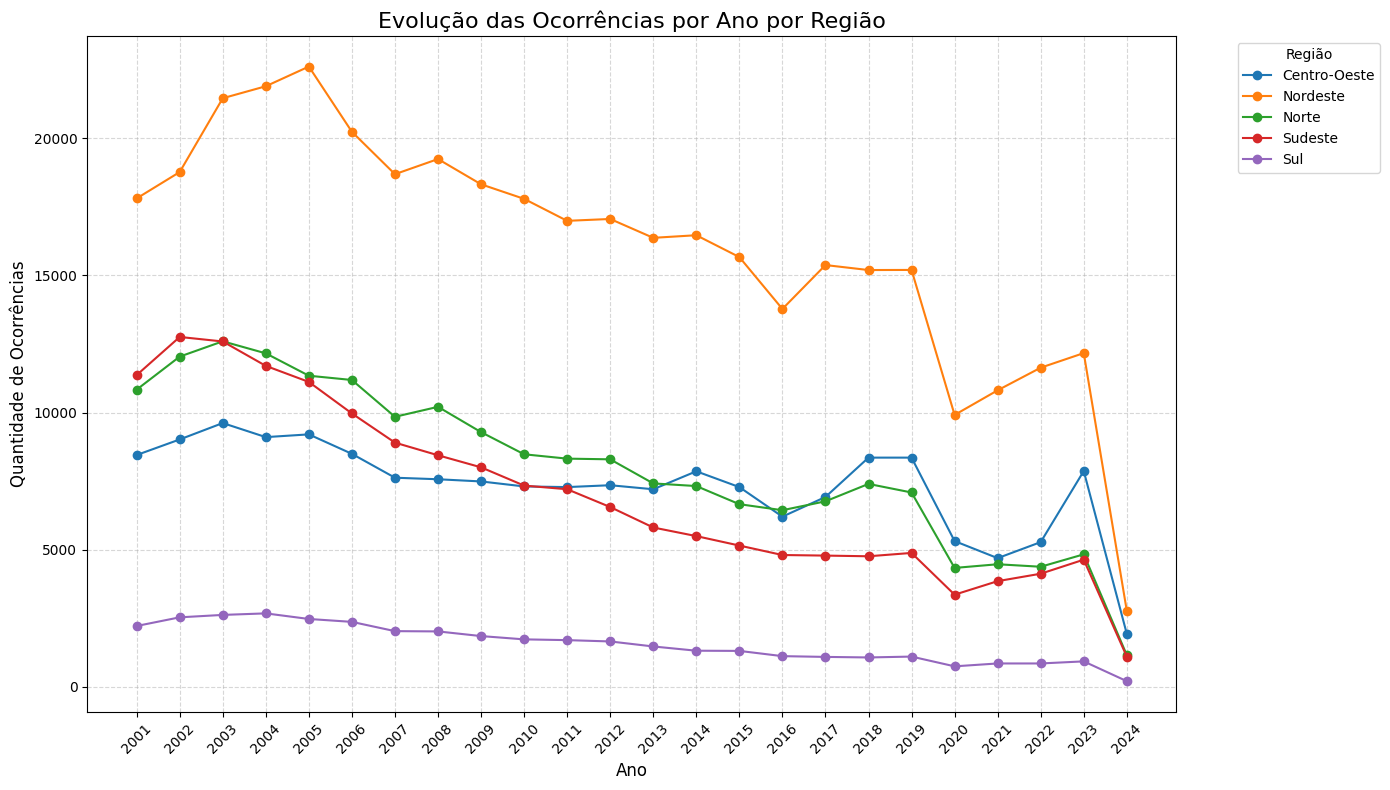

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Criar DataFrame de estados com regiões
df_estados = pd.DataFrame(dados_est)

# Adicionar a coluna de região ao DataFrame de dados com base no estado
df_dados_estado = df_dados.merge(df_estados[['id', 'sigla', 'regiao']], left_on='SG_UF_NOT', right_on='id', how='left')

# Agrupar por ano e região (agora sem separar por estado)
dados_agrupados_regiao = df_dados_estado.groupby(['NU_ANO', 'regiao']).size().reset_index(name='quantidade')

# Obter lista única de regiões
regioes = dados_agrupados_regiao['regiao'].unique()

# Criar um gráfico de linha para todos os dados por região
fig, ax = plt.subplots(figsize=(14, 8))

# Plotar as ocorrências totais para cada região ao longo dos anos
for regiao in regioes:
    dados_regiao = dados_agrupados_regiao[dados_agrupados_regiao['regiao'] == regiao]
    ax.plot(
        dados_regiao['NU_ANO'],
        dados_regiao['quantidade'],
        marker='o',
        label=regiao
    )

# Configurar o título e rótulos dos eixos
ax.set_title('Evolução das Ocorrências por Ano por Região', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Quantidade de Ocorrências', fontsize=12)

# Melhorar a visualização
plt.xticks(dados_agrupados_regiao['NU_ANO'].unique(), rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Exibir legenda com as regiões
ax.legend(title="Região", bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()


## Mortalidade

### Por Ano

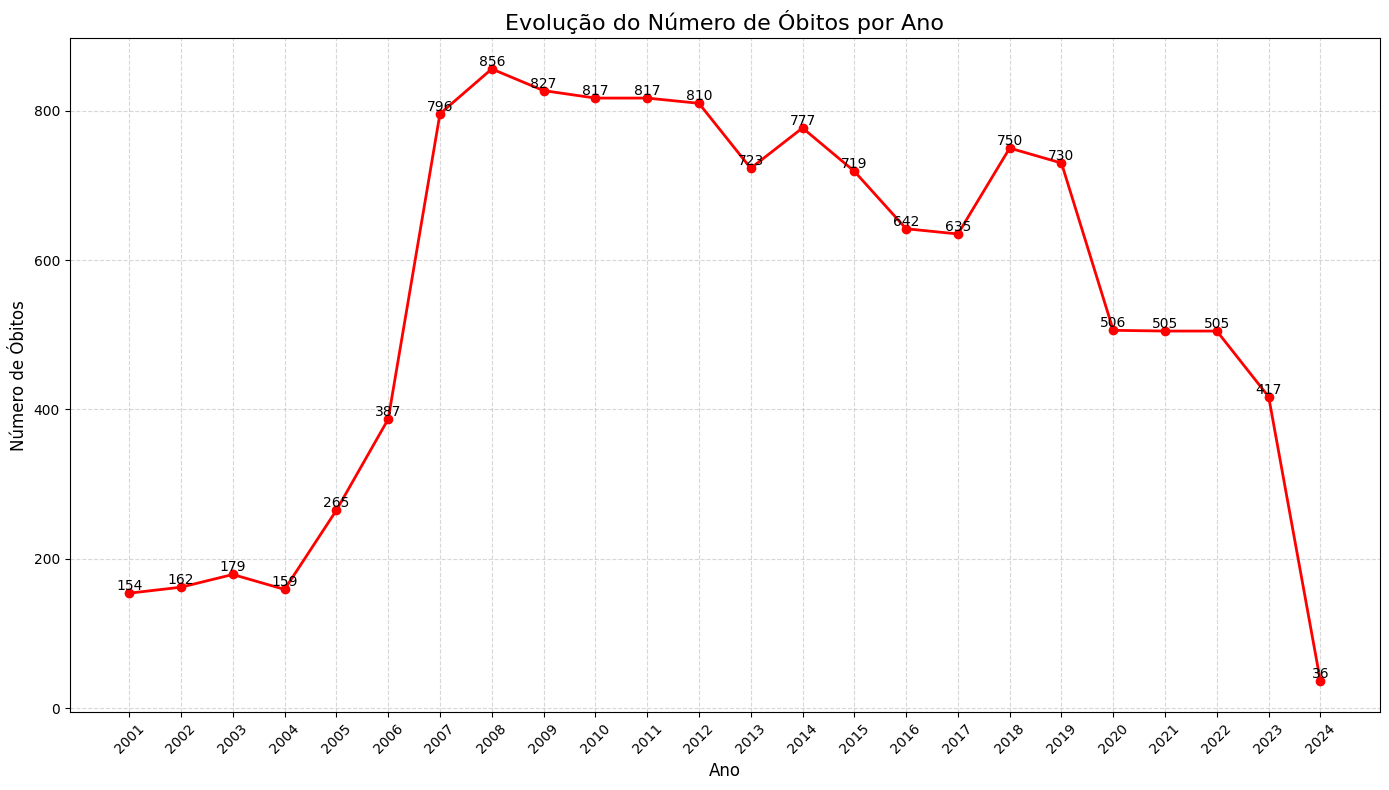

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar os dados para considerar apenas óbitos (TPALTA_N == 4)
df_obitos = df_dados[df_dados['TPALTA_N'] == 4]

# Agrupar os dados por ano e contar a quantidade de óbitos
dados_agrupados_obitos = df_obitos.groupby('NU_ANO').size().reset_index(name='quantidade_obitos')

# Criar o gráfico de linha
fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(
    dados_agrupados_obitos['NU_ANO'],
    dados_agrupados_obitos['quantidade_obitos'],
    marker='o',
    linestyle='-',
    linewidth=2,
    color='r'  # Cor vermelha para óbitos
)

# Adicionar os números de óbitos nos pontos do gráfico
for i, txt in enumerate(dados_agrupados_obitos['quantidade_obitos']):
    ax.annotate(txt, (dados_agrupados_obitos['NU_ANO'][i], dados_agrupados_obitos['quantidade_obitos'][i]),
                fontsize=10, ha='center', va='bottom')

# Configurar título e rótulos dos eixos
ax.set_title('Evolução do Número de Óbitos por Ano', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Número de Óbitos', fontsize=12)

# Melhorar a visualização
plt.xticks(dados_agrupados_obitos['NU_ANO'], rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)

# Exibir o gráfico
plt.tight_layout()
plt.show()


### Por Mês 

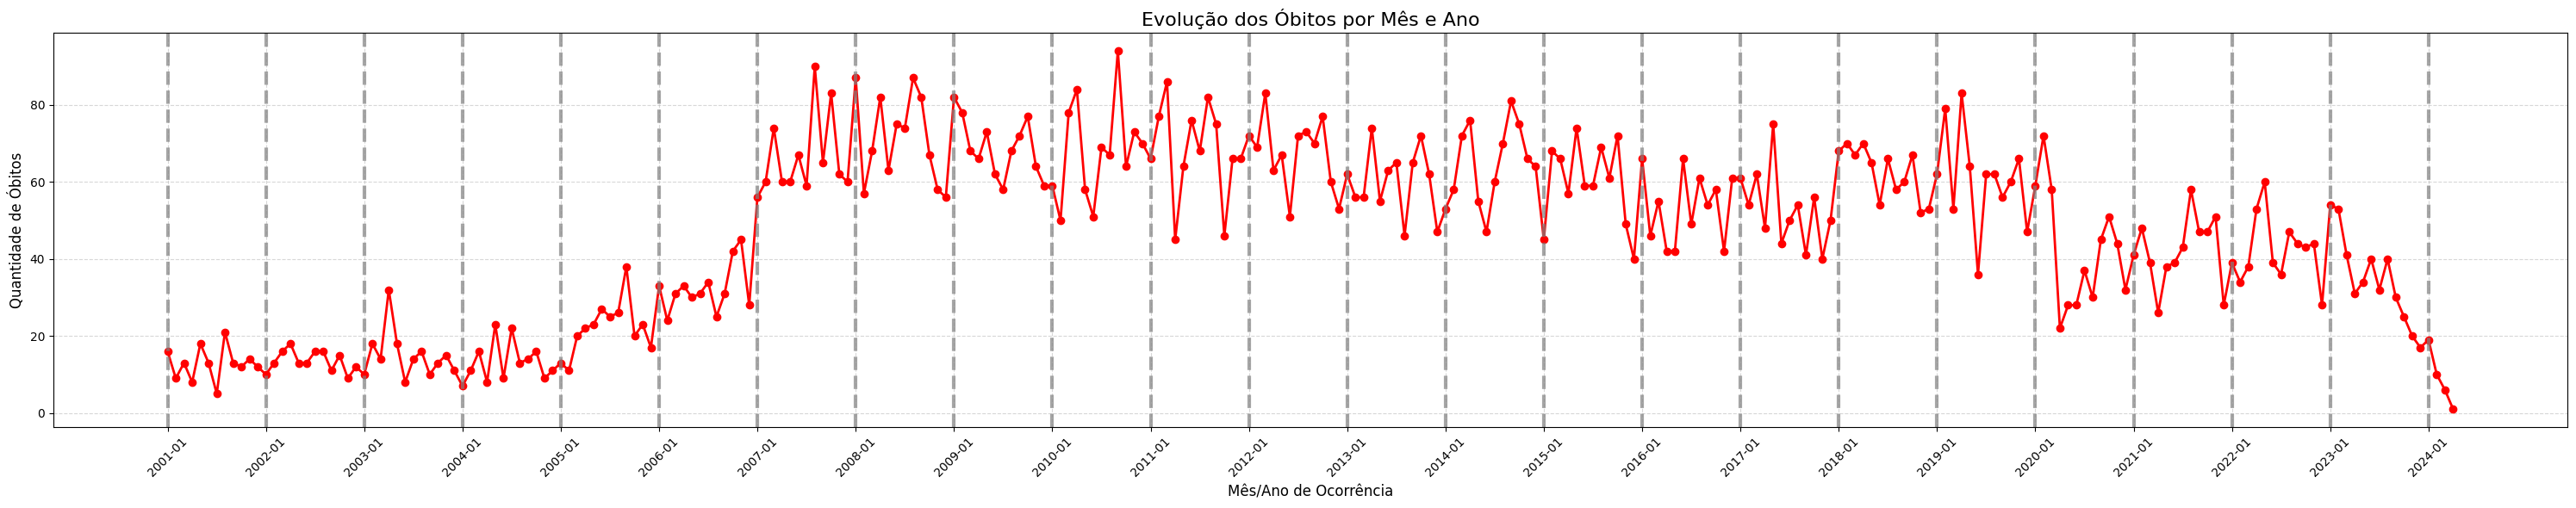

In [58]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar os dados para considerar apenas óbitos (TPALTA_N == 4)
df_obitos = df_dados[df_dados['TPALTA_N'] == 4].copy()  # Usar .copy() para evitar o aviso

# Converter a coluna DT_NOTIFIC para datetime
df_obitos.loc[:, "DT_NOTIFIC"] = pd.to_datetime(df_obitos["DT_NOTIFIC"], format='%Y%m%d', errors='coerce')

# Criar uma nova coluna no formato "AAAA-MM"
df_obitos.loc[:, "ANO_MES"] = df_obitos["DT_NOTIFIC"].dt.to_period("M").astype(str)

# Agrupar os dados por "ANO_MES" e contar a quantidade de óbitos
dados_agrupados_obitos = df_obitos.groupby("ANO_MES").size().reset_index(name="quantidade_obitos")

# Detectar mudanças de ano para adicionar linhas verticais
dados_agrupados_obitos["ANO"] = dados_agrupados_obitos["ANO_MES"].str[:4]
anos_unicos = dados_agrupados_obitos["ANO"].drop_duplicates().index

# Plotar o gráfico de linha com todos os pontos
fig, ax = plt.subplots(figsize=(30, 6))

ax.plot(
    dados_agrupados_obitos["ANO_MES"],
    dados_agrupados_obitos["quantidade_obitos"],
    marker='o',
    linestyle='-',
    linewidth=2,
    color='r'  # Cor vermelha para óbitos
)

# Configurar título e rótulos dos eixos
ax.set_title("Evolução dos Óbitos por Mês e Ano", fontsize=16)
ax.set_xlabel("Mês/Ano de Ocorrência", fontsize=12)
ax.set_ylabel("Quantidade de Óbitos", fontsize=12)

# Ajustar os ticks (marcadores) do eixo X para exibir de 6 em 6 meses (somente legenda)
xticks = dados_agrupados_obitos["ANO_MES"][::12]  # Seleciona a cada 12 meses (1 ano)
ax.set_xticks(xticks)
ax.set_xticklabels(xticks, rotation=45)

# Adicionar linhas verticais nos inícios de cada ano
for ano_idx in anos_unicos:
    ax.axvline(x=ano_idx, color='gray', linestyle='--', linewidth=3, alpha=0.7)

# Exibir grid para melhor visualização
plt.grid(True, linestyle='--', alpha=0.5)

# Ajustar a disposição do layout
plt.tight_layout()

# Exibir o gráfico
plt.show()


### Por Estado

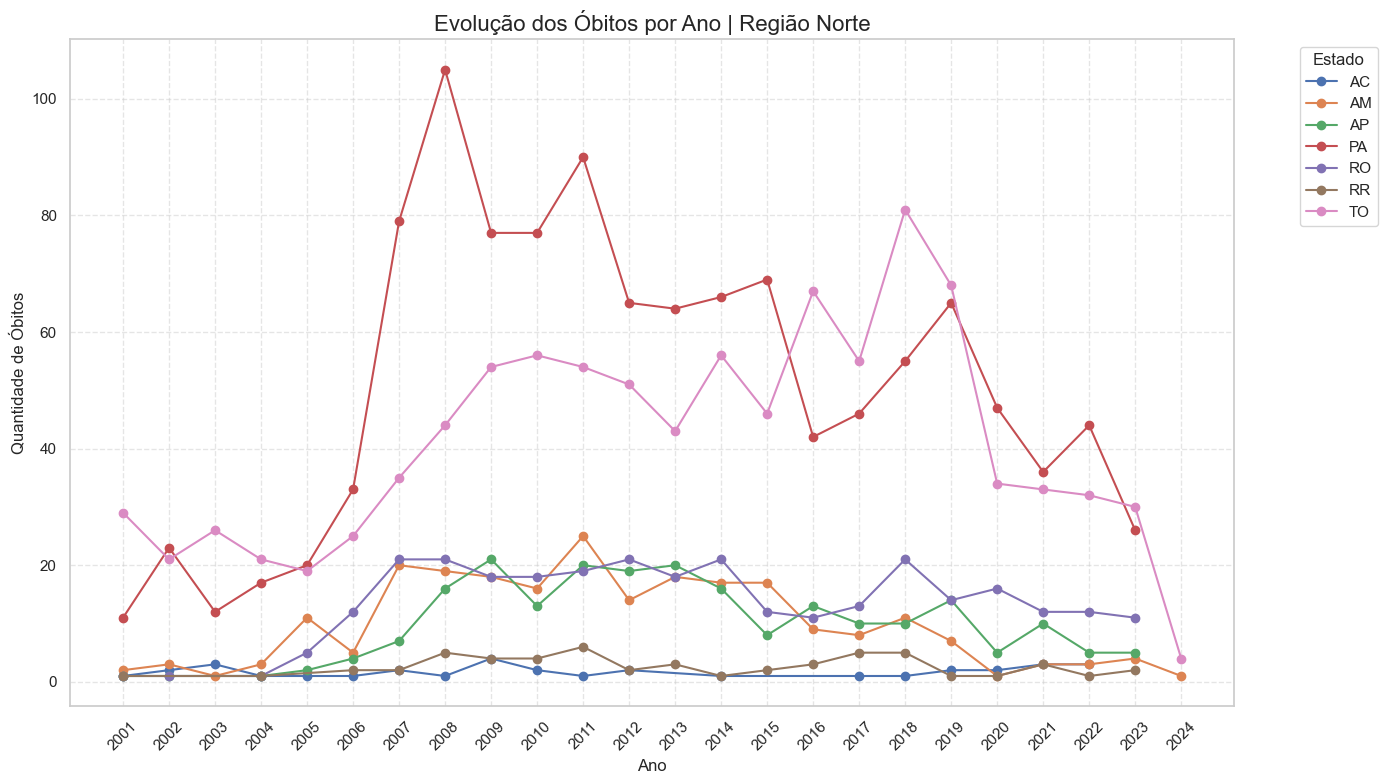

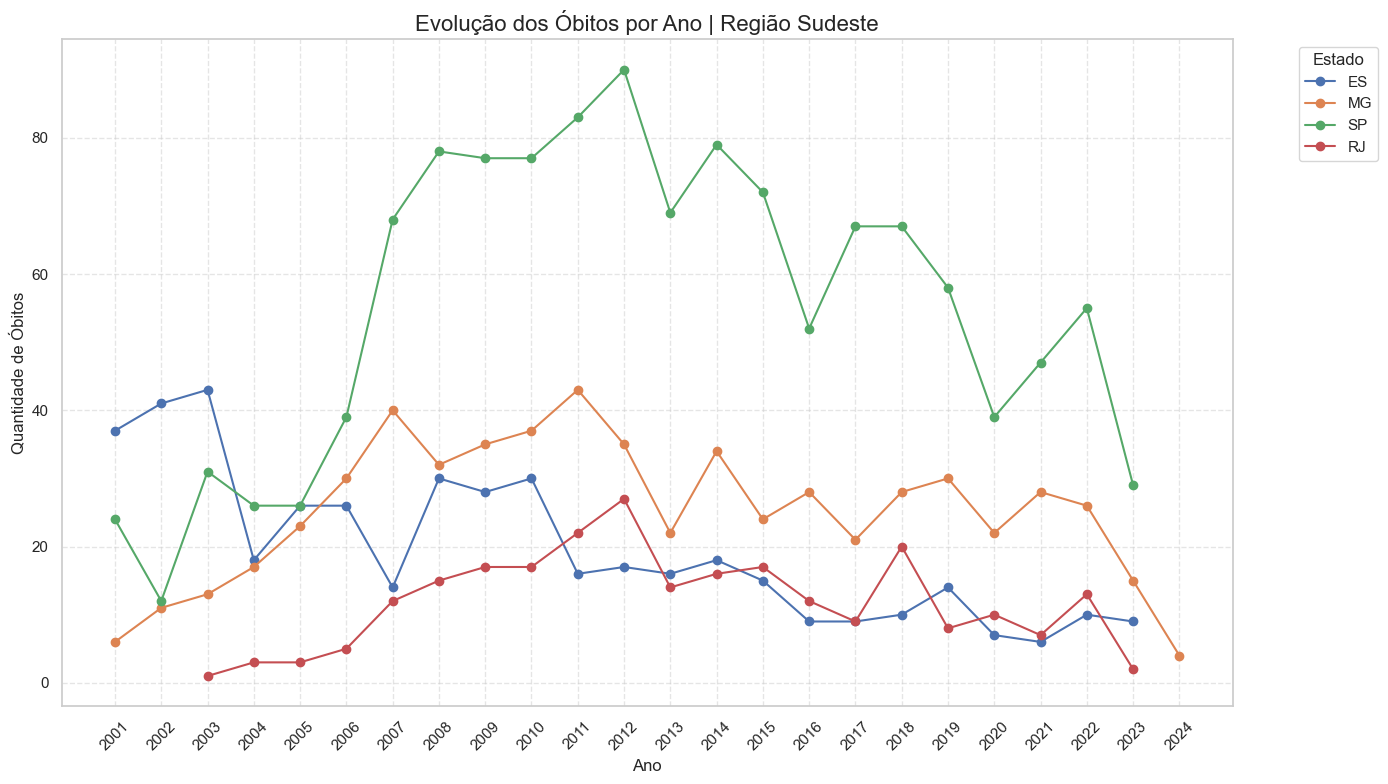

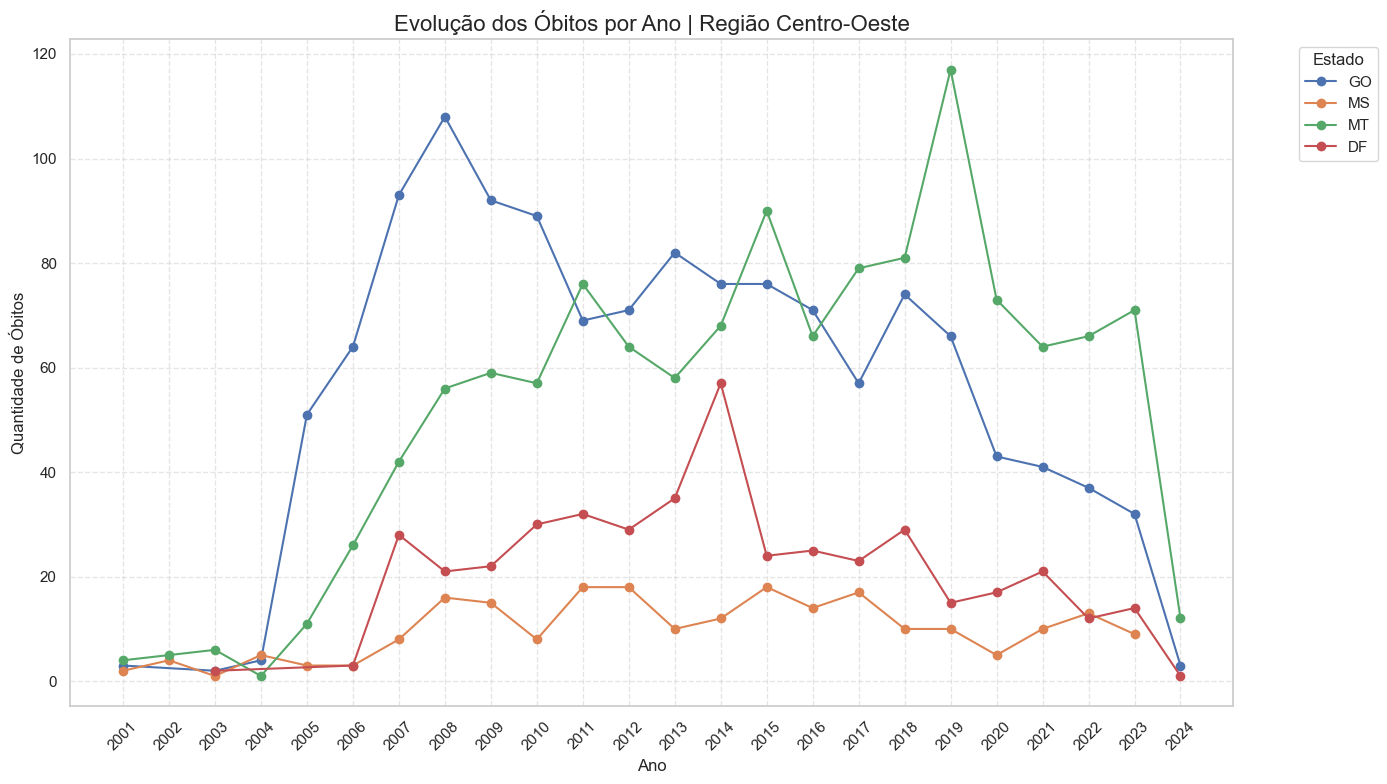

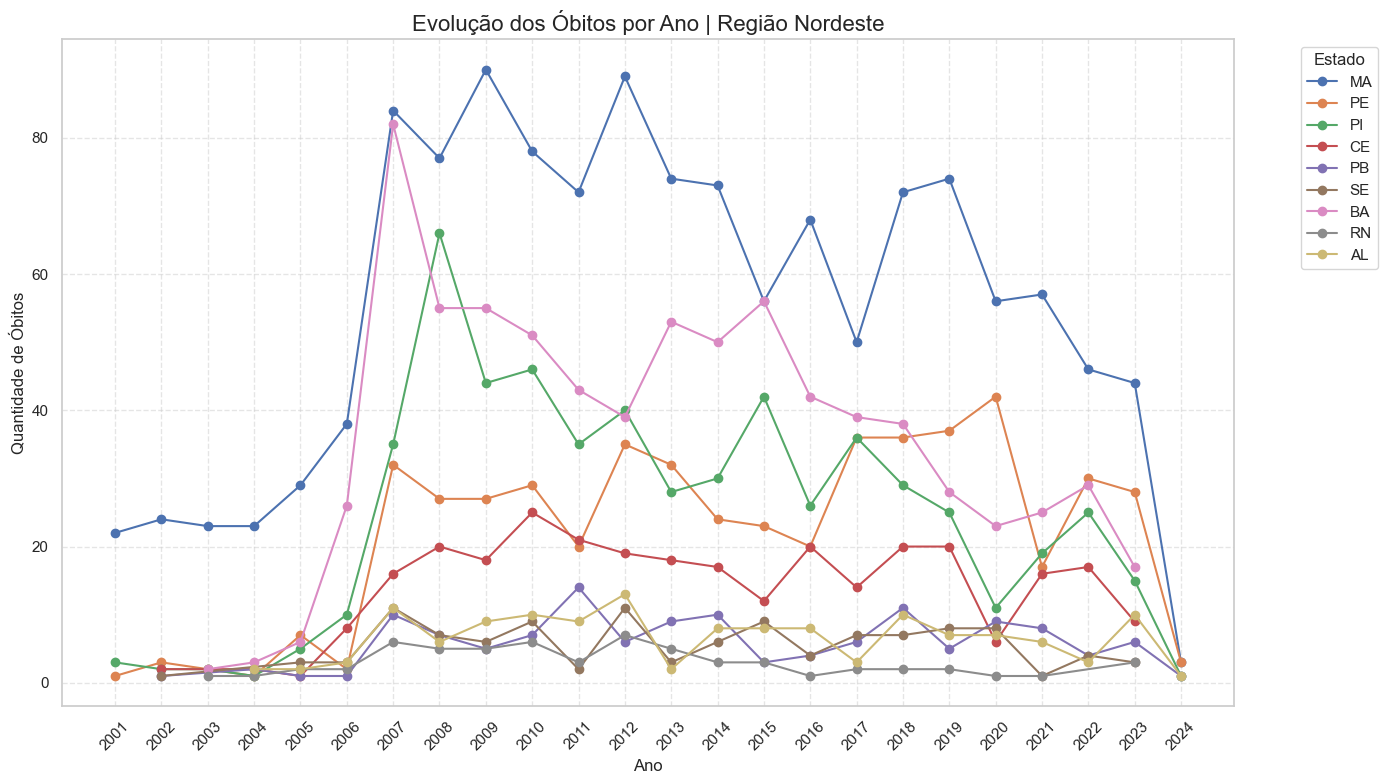

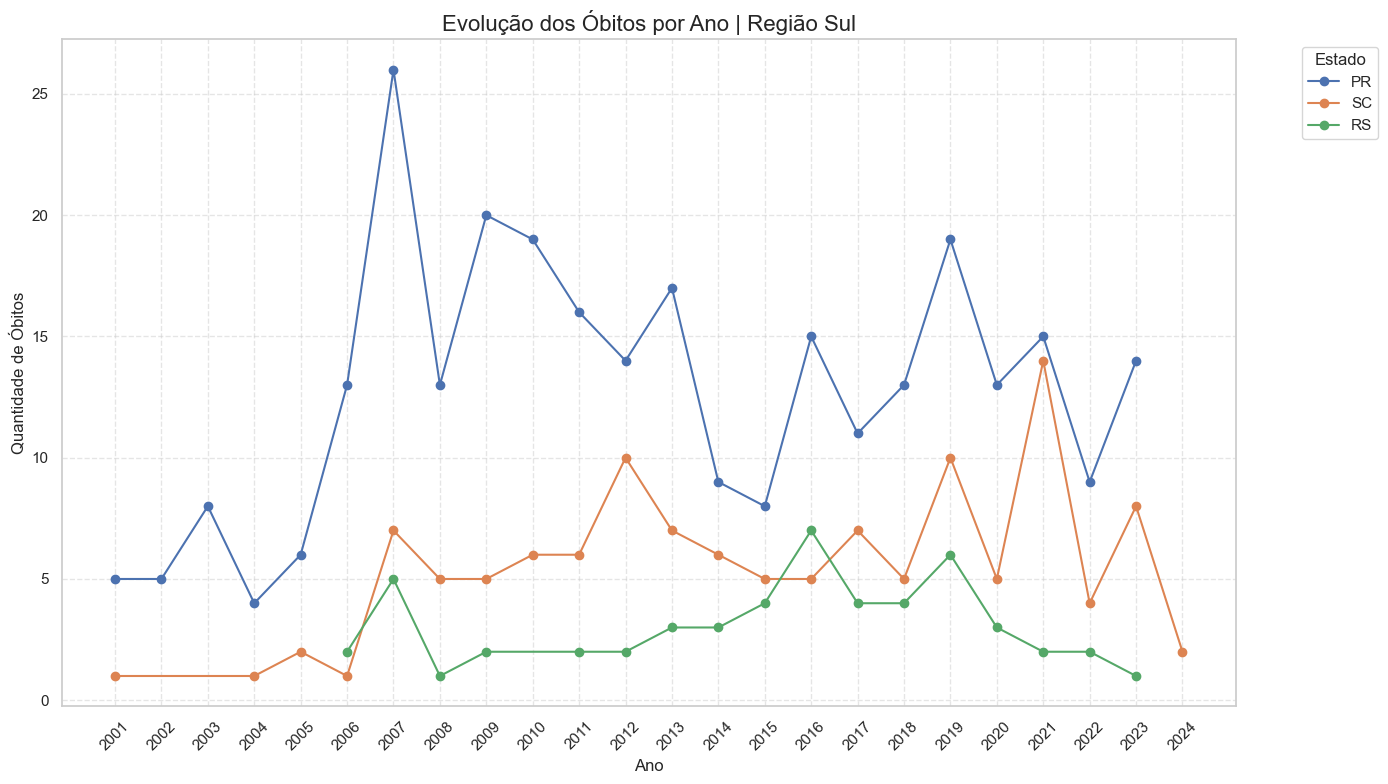

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

# Filtrar os dados para considerar apenas óbitos (TPALTA_N == 4)
df_obitos = df_dados[df_dados['TPALTA_N'] == 4].copy()  # Usar .copy() para evitar o aviso

# Criar DataFrame de estados
df_estados = pd.DataFrame(dados_est)

# Adicionar ao DataFrame original uma coluna para os nomes dos estados e regiões
df_dados_estado = df_obitos.merge(df_estados[['id', 'sigla', 'regiao']], left_on='SG_UF_NOT', right_on='id', how='left')

# Agrupar por ano, estado e região para óbitos
dados_agrupados_obitos = df_dados_estado.groupby(['NU_ANO', 'sigla', 'regiao']).size().reset_index(name='quantidade_obitos')

# Obter lista única de regiões
regioes = dados_agrupados_obitos['regiao'].unique()

# Criar gráficos de linha para cada região
for regiao in regioes:
    fig, ax = plt.subplots(figsize=(14, 8))

    dados_regiao = dados_agrupados_obitos[dados_agrupados_obitos['regiao'] == regiao]

    for estado in dados_regiao['sigla'].unique():
        dados_estado = dados_regiao[dados_regiao['sigla'] == estado]
        ax.plot(
            dados_estado['NU_ANO'],
            dados_estado['quantidade_obitos'],
            marker='o',
            label=estado
        )

    # Configurar títulos e rótulos
    ax.set_title(f'Evolução dos Óbitos por Ano | Região {regiao}', fontsize=16)
    ax.set_xlabel('Ano', fontsize=12)
    ax.set_ylabel('Quantidade de Óbitos', fontsize=12)

    # Melhorar a visualização
    plt.xticks(dados_agrupados_obitos['NU_ANO'].unique(), rotation=45)
    plt.grid(True, linestyle='--', alpha=0.5)
    ax.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Ajustar o layout para evitar sobreposição
    plt.tight_layout()

    # Exibir o gráfico para a região atual
    plt.show()


### Por Região

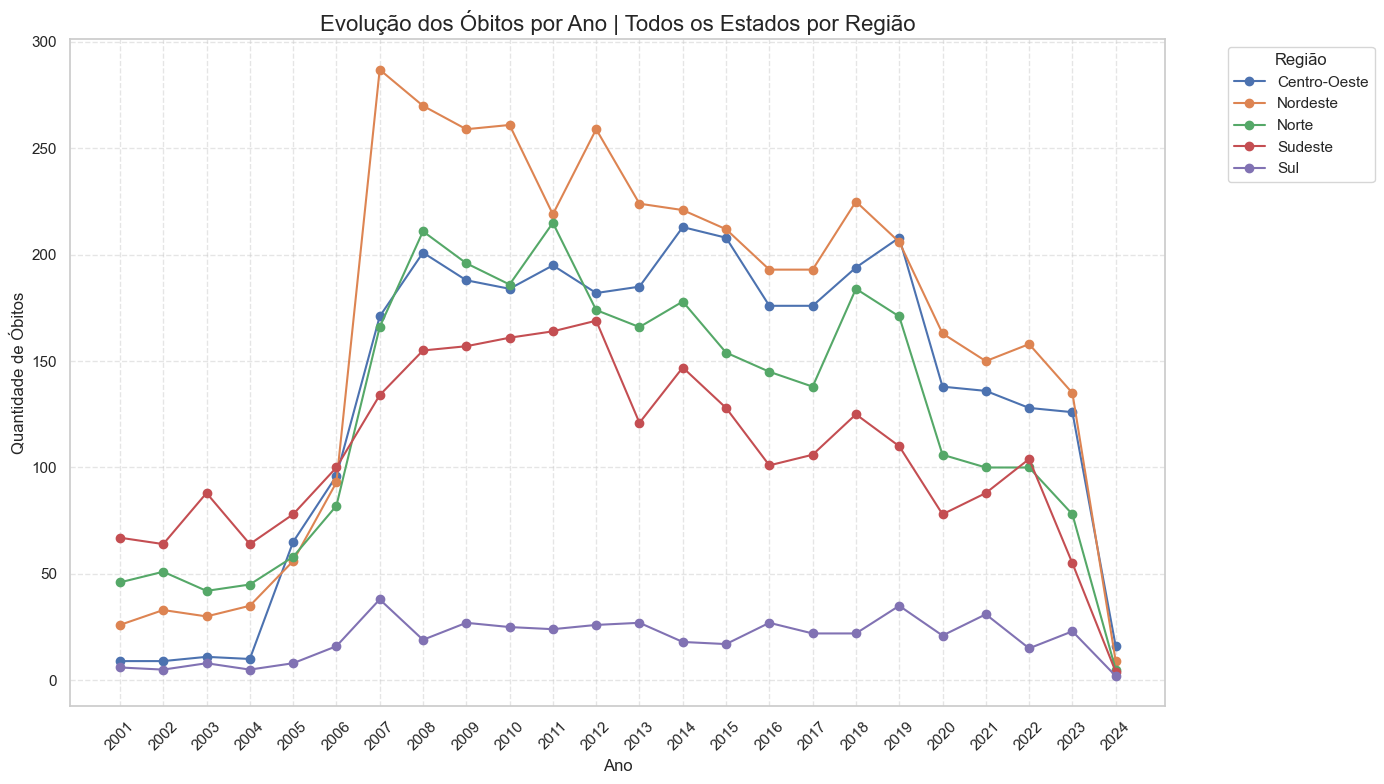

In [88]:
# Filtrar os dados para considerar apenas óbitos (TPALTA_N == 4)
df_obitos = df_dados[df_dados['TPALTA_N'] == 4].copy()  # Usar .copy() para evitar o aviso

# Criar DataFrame de estados
df_estados = pd.DataFrame(dados_est)

# Adicionar ao DataFrame original uma coluna para os nomes dos estados e regiões
df_dados_estado = df_obitos.merge(df_estados[['id', 'sigla', 'regiao']], left_on='SG_UF_NOT', right_on='id', how='left')

# Agrupar por ano e região para óbitos
dados_agrupados_obitos = df_dados_estado.groupby(['NU_ANO', 'regiao']).size().reset_index(name='quantidade_obitos')

# Obter lista única de regiões
regioes = dados_agrupados_obitos['regiao'].unique()

# Criar gráfico de linha para cada região, com a soma dos óbitos por ano
fig, ax = plt.subplots(figsize=(14, 8))

# Para cada região, plotar os dados de óbitos
for regiao in regioes:
    dados_regiao = dados_agrupados_obitos[dados_agrupados_obitos['regiao'] == regiao]
    ax.plot(
        dados_regiao['NU_ANO'],
        dados_regiao['quantidade_obitos'],
        marker='o',
        label=regiao
    )

# Configurar título e rótulos
ax.set_title('Evolução dos Óbitos por Ano | Todos os Estados por Região', fontsize=16)
ax.set_xlabel('Ano', fontsize=12)
ax.set_ylabel('Quantidade de Óbitos', fontsize=12)

# Melhorar a visualização
plt.xticks(dados_agrupados_obitos['NU_ANO'].unique(), rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
ax.legend(title="Região", bbox_to_anchor=(1.05, 1), loc='upper left')

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico para as regiões
plt.show()


## PCA

In [72]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(numeric_df)
autovalores = pca.explained_variance_
autovetores = pca.components_

In [75]:
print(f"Tamanho de fatores_x: {len(autovetores)}")
print(f"Tamanho de autovalores: {len(autovalores)}")

Tamanho de fatores_x: 38
Tamanho de autovalores: 38


### Variância Compartilhada
Quantidade de fatores a serem utilizados usando o método de Keiser, baixa pegar os fatores que explicam a variância de mais de 1 variável

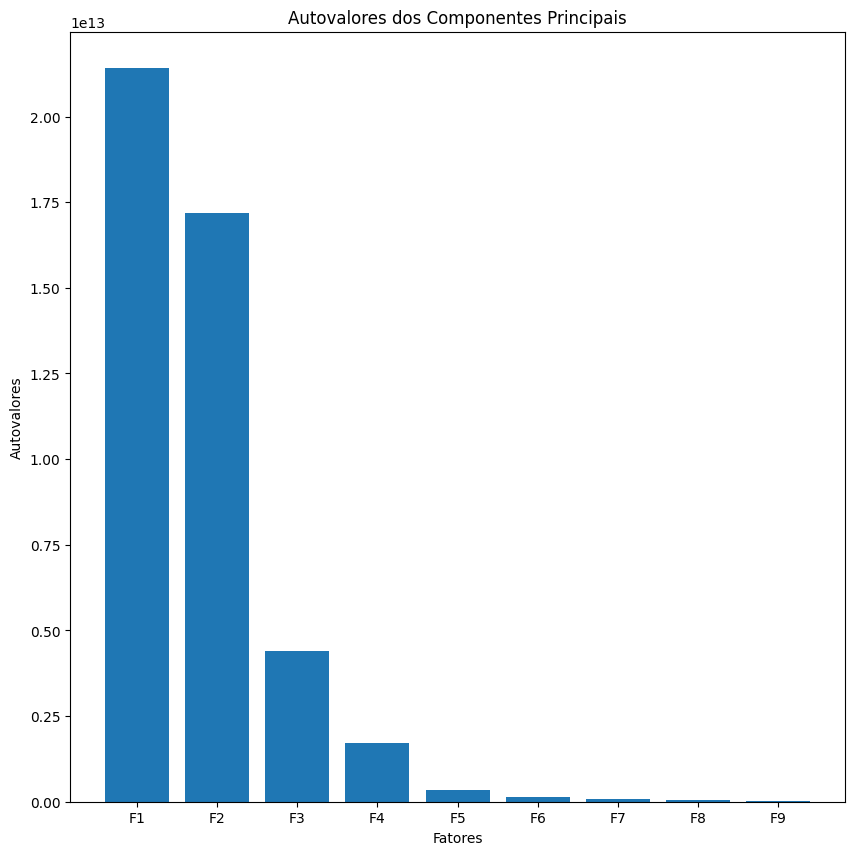

In [76]:
# Ajustar autovalores para corresponder a fatores_x
autovalores_ajustados = autovalores[:len(fatores_x)]

# Gerar gráfico
fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
ax.bar(x=fatores_x, height=autovalores_ajustados)
ax.set_title('Autovalores dos Componentes Principais')
ax.set_xlabel('Fatores')
ax.set_ylabel('Autovalores')
plt.show()

### Análise de Variância Compartilhada Acumulada (PCA)
Soma acumulada da variância explicada de cada fator em relação ao total.

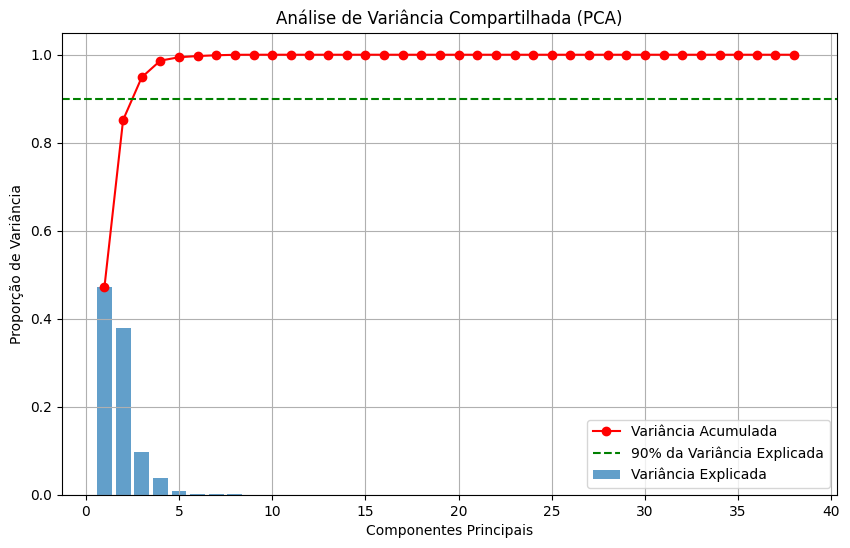

In [78]:
# Proporção de variância explicada por cada componente
variancia_explicada = pca.explained_variance_ratio_

# Variância acumulada
variancia_acumulada = variancia_explicada.cumsum()

# Gráfico de variância explicada e acumulada
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(range(1, len(variancia_explicada) + 1), variancia_explicada, alpha=0.7, label='Variância Explicada')
ax.plot(range(1, len(variancia_acumulada) + 1), variancia_acumulada, marker='o', color='red', label='Variância Acumulada')

# Customizar o gráfico
ax.set_title('Análise de Variância Compartilhada (PCA)')
ax.set_xlabel('Componentes Principais')
ax.set_ylabel('Proporção de Variância')
ax.axhline(y=0.9, color='green', linestyle='--', label='90% da Variância Explicada')  # Limite de 90%
ax.legend()
plt.grid()
plt.show()

### Normalização
Distribuição de cada uma das variáveis e colocá-las todas dentro de um mesmo intervalo.

In [79]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
dados_std = std.fit_transform(numeric_df)

In [81]:
pca = PCA()
dados_pca = pca.fit_transform(dados_std)

### Definição de Comunalidade
A comunalidade representa a variância total compartilhada da cada uma das variáveis originais com todos os fatores extraídos. Ou seja, o que é comum de cada variável nos fatores?

In [86]:
# Criar DataFrame com os fatores calculados no PCA
dados_fatores = pd.DataFrame(pca.transform(dados_pca), columns=[f'F{i+1}' for i in range(len(numeric_df.columns))])

# Juntar as variáveis originais com os fatores
dados_cargas = numeric_df.copy()  # Copiar as variáveis originais
for fator in dados_fatores.columns[:3]:  # Ajustar para os fatores desejados (F1, F2, F3)
    dados_cargas[fator] = dados_fatores[fator]

# Calcular as correlações (cargas fatoriais)
cargas_fatoriais = dados_cargas.corr().iloc[:len(numeric_df.columns), len(numeric_df.columns):]

# Exibir as correlações entre variáveis originais e os fatores
cargas_fatoriais.head()


F1        F2        F3
DT_NOTIFIC -0.138131 -0.275341  0.080483
NU_ANO     -0.138237 -0.275265  0.080569
SG_UF_NOT   0.175838 -0.204829 -0.184459
ID_MUNICIP  0.176025 -0.204877 -0.184528
ID_REGIONA  0.030977 -0.054477  0.001470

## Associação com dados IBGE

In [89]:
# Carregar os dados
dados_ibge = pd.read_csv("data/populacao_municipios.csv")

In [66]:
dados_ibge.info()
dados_ibge.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150950 entries, 0 to 150949
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ano             150950 non-null  int64 
 1   id_municipio    150950 non-null  int64 
 2   nome_municipio  150950 non-null  object
 3   sigla_uf        150950 non-null  object
 4   pessoas         150950 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 5.8+ MB


ano  id_municipio   nome_municipio sigla_uf  pessoas
0  1970       1100106    Guajará-Mirim       RO    27016
1  1970       1100205      Porto Velho       RO    84048
2  1970       1200104        Brasiléia       AC    12311
3  1970       1200203  Cruzeiro do Sul       AC    43584
4  1970       1200302            Feijó       AC    15768

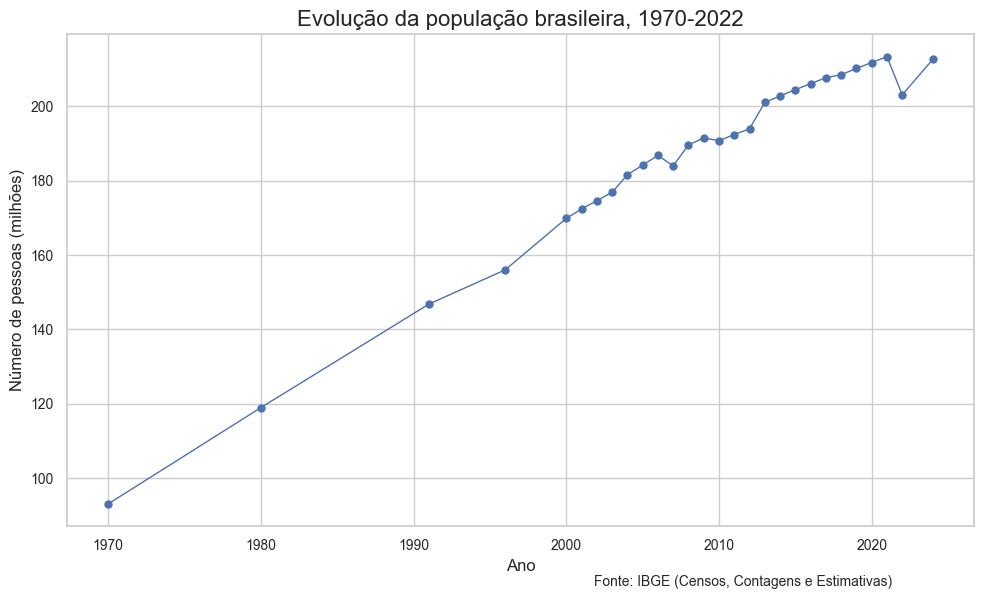

In [90]:




# Agrupar por ano e somar o número de pessoas
dados_agrupados = (
    dados_ibge.groupby("ano", as_index=False)
    .agg(n_pessoas=("pessoas", "sum"))
)

# Configurar o estilo do gráfico
sns.set_theme(style="whitegrid")

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(dados_agrupados["ano"], dados_agrupados["n_pessoas"] / 1_000_000, 
         linewidth=1, marker="o", markersize=5)

# Personalizar o gráfico
plt.title("Evolução da população brasileira, 1970-2022", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Número de pessoas (milhões)", fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))  # Formatar os números no eixo Y
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.figtext(0.9, 0.01, "Fonte: IBGE (Censos, Contagens e Estimativas)", fontsize=10, ha="right")

# Exibir o gráfico
plt.tight_layout()
plt.show()


### por ano e por estado

In [112]:
# Preencher dados faltantes de população utilizando interpolação
df_obitos_estado_populacao_interpolado = df_obitos_estado_populacao.copy()

# Interpolação linear para preencher os valores de 'populacao' nulos
df_obitos_estado_populacao_interpolado['populacao'] = df_obitos_estado_populacao_interpolado.groupby('sigla')['populacao'].transform(lambda x: x.interpolate(method='linear'))

# Filtrar os dados válidos após interpolação
df_obitos_estado_populacao_interpolado_validos = df_obitos_estado_populacao_interpolado.dropna(subset=['populacao'])

# Calcular a taxa de óbitos após interpolação
df_obitos_estado_populacao_interpolado_validos['taxa_obitos_100k'] = (
    df_obitos_estado_populacao_interpolado_validos['quantidade_obitos'] / df_obitos_estado_populacao_interpolado_validos['populacao']
) * 100000

# Verificar o DataFrame final após interpolação
df_obitos_estado_populacao_interpolado_validos.head()


NU_ANO sigla  quantidade_obitos     ano sigla_uf  populacao  \
0    2001    AC                  1  2001.0       AC   574355.0   
1    2001    AM                  2  2001.0       AM  2900240.0   
2    2001    AP                  1  2001.0       AP   498735.0   
3    2001    ES                 37  2001.0       ES  3155016.0   
4    2001    GO                  3  2001.0       GO  5116462.0   

   taxa_obitos_100k        regiao  
0          0.174108         Norte  
1          0.068960         Norte  
2          0.200507         Norte  
3          1.172736       Sudeste  
4          0.058634  Centro-Oeste

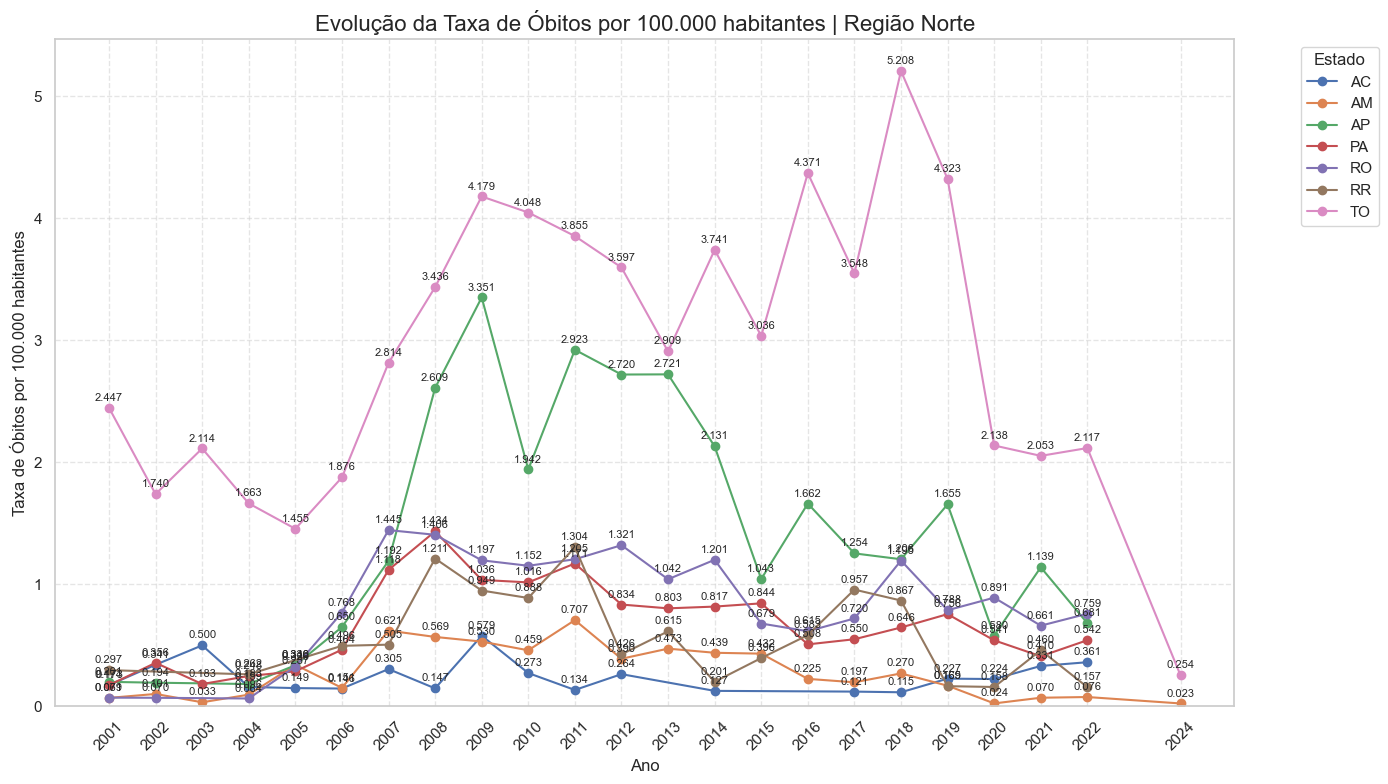

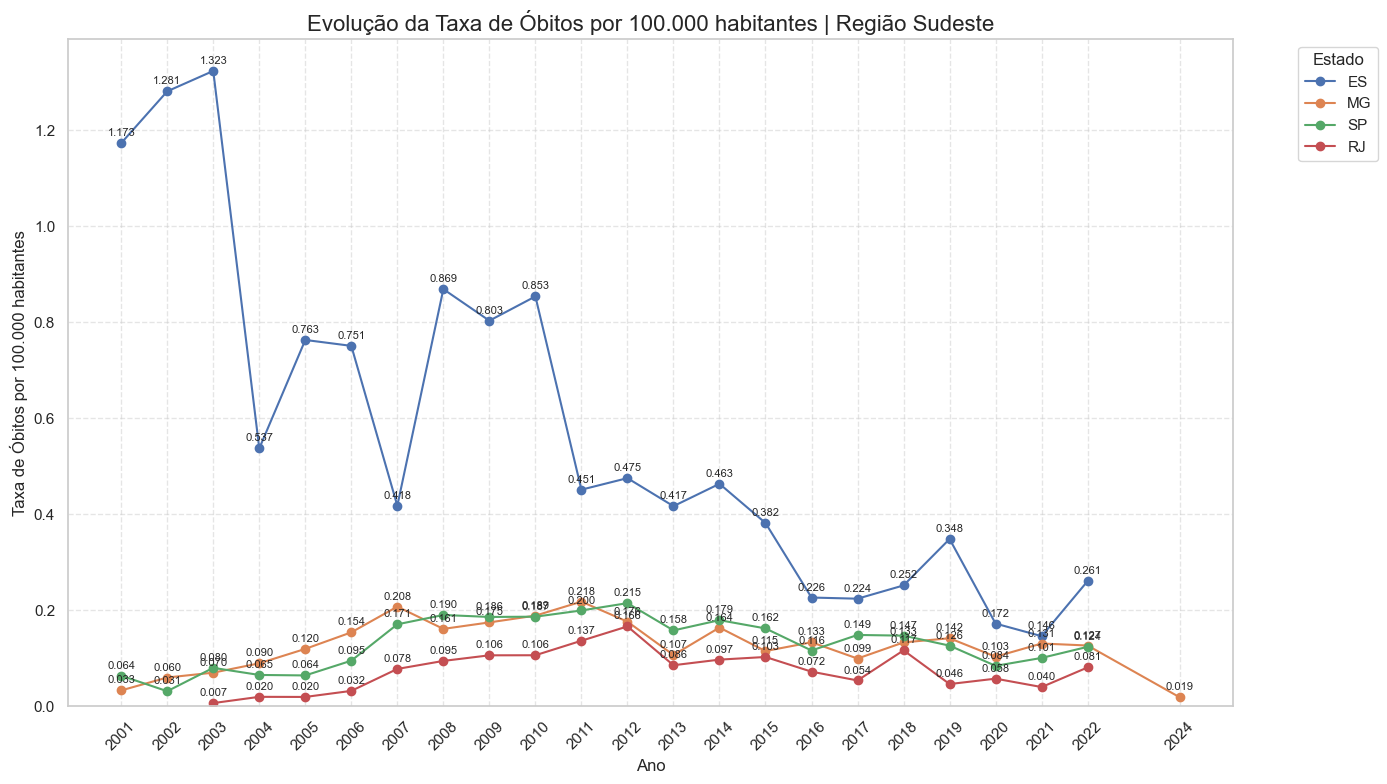

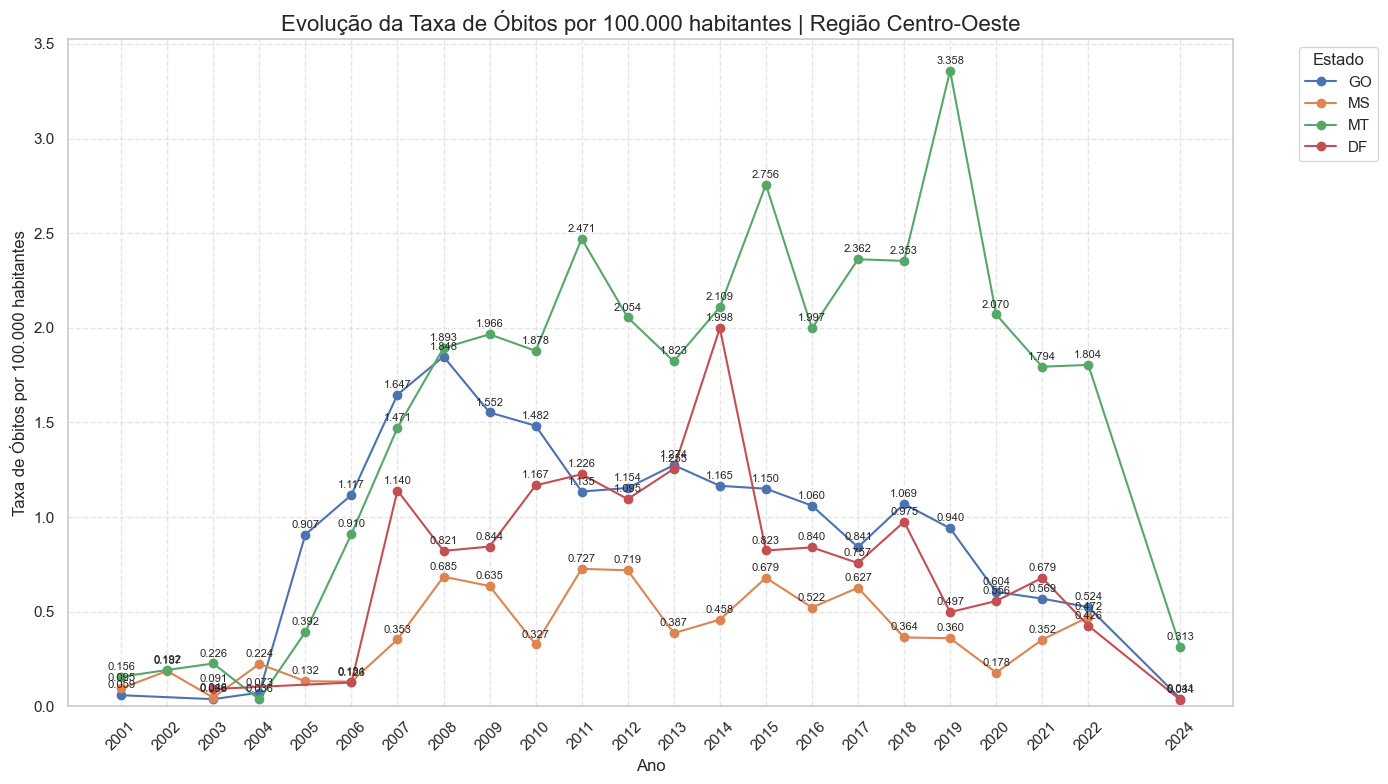

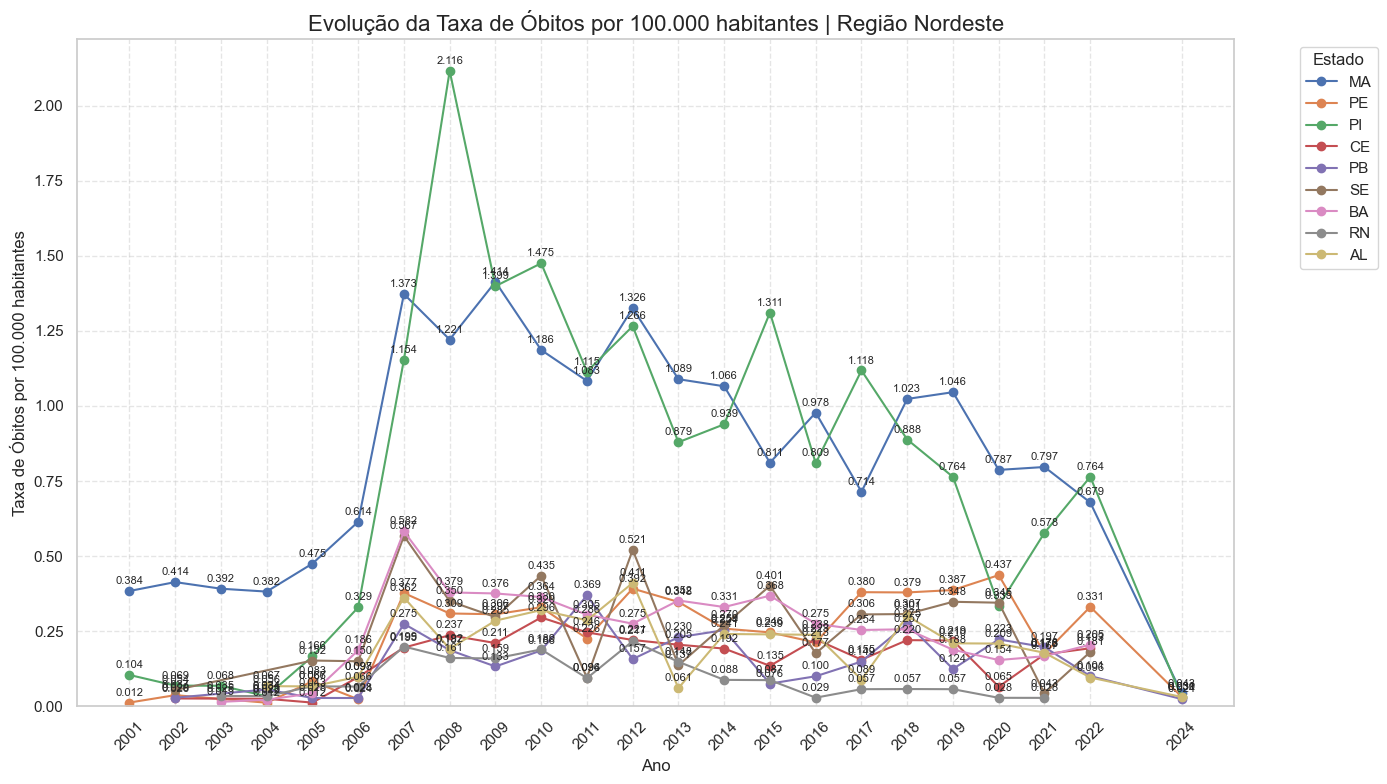

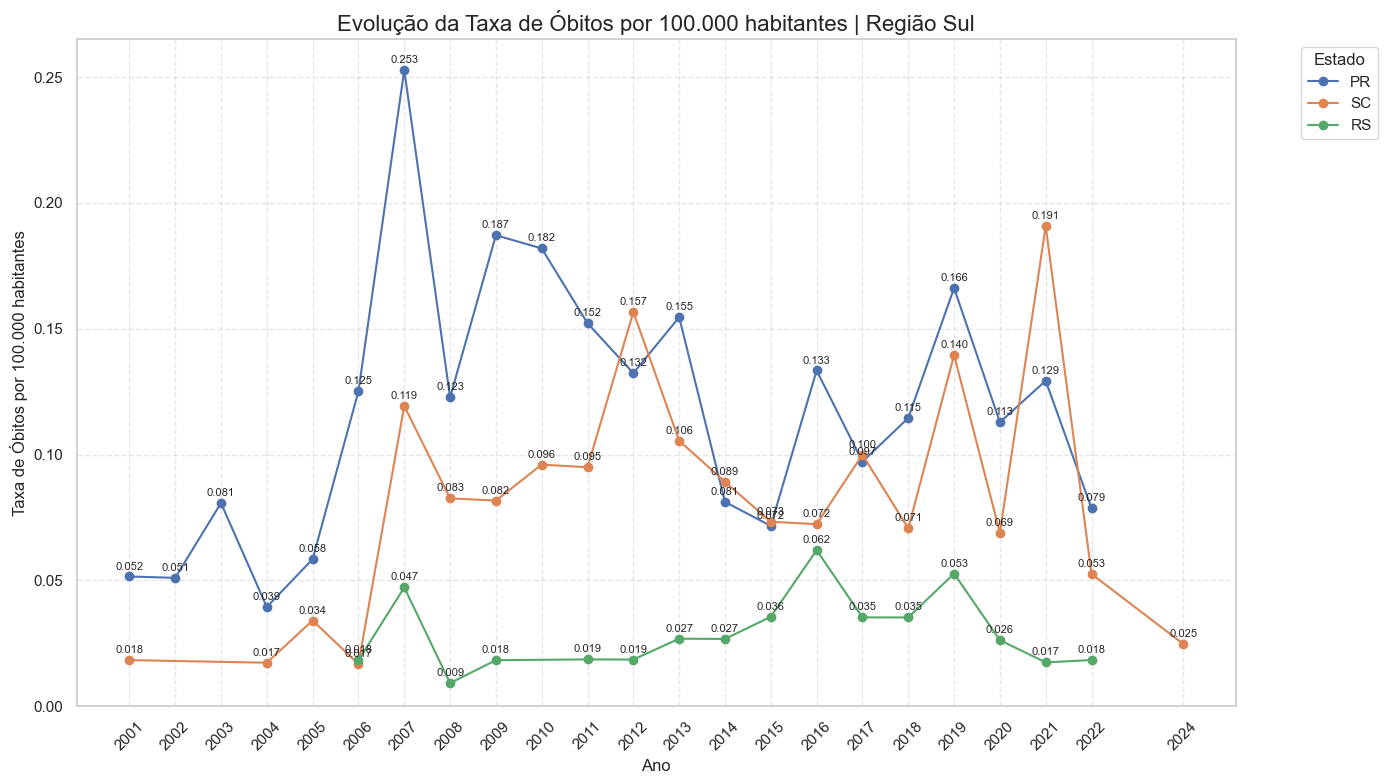

In [114]:
import matplotlib.pyplot as plt

# Adicionar a região ao DataFrame
df_obitos_estado_populacao = df_obitos_estado_populacao.merge(
    df_estados[['sigla', 'regiao']],  # Supondo que você tenha a coluna 'regiao'
    on='sigla',
    how='left'
)

# Obter lista única de regiões
regioes = df_obitos_estado_populacao['regiao'].unique()

# Gerar um gráfico para cada região
for regiao in regioes:
    fig, ax = plt.subplots(figsize=(14, 8))
    
    # Filtrar dados da região atual
    dados_regiao = df_obitos_estado_populacao[df_obitos_estado_populacao['regiao'] == regiao]
    
    # Garantir que dados não nulos sejam considerados para a taxa de óbitos
    dados_regiao = dados_regiao.dropna(subset=['taxa_obitos_100k'])
    
    # Plotar a taxa de óbitos por estado dentro da região
    for estado in dados_regiao['sigla'].unique():
        dados_estado = dados_regiao[dados_regiao['sigla'] == estado]
        
        # Plotar a taxa de óbitos por 100.000 habitantes para cada estado
        ax.plot(
            dados_estado['NU_ANO'],
            dados_estado['taxa_obitos_100k'],
            marker='o',
            label=estado
        )
    
    # Configurar títulos e rótulos
    ax.set_title(f'Evolução da Taxa de Óbitos por 100.000 habitantes | Região {regiao}', fontsize=16)
    ax.set_xlabel('Ano', fontsize=12)
    ax.set_ylabel('Taxa de Óbitos por 100.000 habitantes', fontsize=12)
    
    # Adicionar valores nos pontos do gráfico, ajustando a posição para evitar sobreposição
    for _, row in dados_regiao.iterrows():
        ax.annotate(f'{row["taxa_obitos_100k"]:.3f}', 
                    (row['NU_ANO'], row['taxa_obitos_100k']),
                    textcoords="offset points",
                    xytext=(0, 5),
                    ha='center',
                    fontsize=8)
    
    # Melhorar a visualização
    plt.xticks(dados_regiao['NU_ANO'].unique(), rotation=45)
    ax.set_ylim(bottom=0)  # Garantir que o eixo Y comece de 0
    plt.grid(True, linestyle='--', alpha=0.5)
    ax.legend(title="Estado", bbox_to_anchor=(1.05, 1), loc='upper left')
    
    # Ajustar layout
    plt.tight_layout()

    # Exibir o gráfico
    plt.show()


## Redes neurais


## Proximo topico

In [1]:
import torch
print(torch.cuda.is_available())

ModuleNotFoundError: No module named 'torch'

### Colunas categoricas

In [16]:
df_dados

TP_NOT  TP_NOT.1  ID_AGRAVO    DT_NOTIFIC    NU_ANO  SG_UF_NOT  \
0           2         2          0      20010110      2001         41   
1           2         2          0      20010117      2001         41   
2           2         2          0      20010116      2001         41   
3           2         2          0      20010108      2001         41   
4           2         2          0      20010102      2001         41   
...       ...       ...        ...           ...       ...        ...   
961301      2         2          0      20240322      2024         17   
961302      2         2          0      20240322      2024         17   
961303      2         2          0      20240223      2024         17   
961304      2         2          0      20240207      2024         17   
961305  Total     14270          0  144413953039  14441240     227616   

        ID_MUNICIP  ID_REGIONA   ID_UNIDADE       DT_DIAG  ...  AVAL_ATU_N  \
0           410304        1359      2741474      20001210  ...           0   
1           410940        1359      2741369      20001223  ...           0   
2           410940        1359      2741369      20010116  ...           0   
3           411780        1359      2743116      20010108  ...           0   
4           411780        1359      2743116      20000111  ...           2   
...            ...         ...          ...           ...  ...         ...   
961301      172100           0      2467984      20240223  ...           0   
961302      172100           0      2492695      20240322  ...           0   
961303      172100           0      2492504      20230926  ...           0   
961304      171820           0      2468417      20230505  ...           0   
961305  2284032882    10156353  27047069741  144399555950  ...         751   

        ESQ_ATU_N  DOSE_RECEB  EPIS_RACIO    DTMUDESQ  CONTEXAM    DTALTA_N  \
0               3           0           0           0         0    20021002   
1               3           0           0           0         2    20011219   
2               1           0           0           0         1    20010627   
3               3           0           0           0         3    20020128   
4               3           0           0           0         0    20020314   
...           ...         ...         ...         ...       ...         ...   
961301          2           2           0           0         0           0   
961302          2           1           0           0         2           0   
961303          2           7           0           0         0           0   
961304          2           1           4           0         0           0   
961305      13234       11280        8705  2772860989      6085  9674814781   

        TPALTA_N  IN_VINCULA  NU_LOTE_IA  
0              1           0           0  
1              1           0           0  
2              1           0           0  
3              1           0           0  
4              1           0           0  
...          ...         ...         ...  
961301         0           0           0  
961302         0           0           0  
961303         0           0           0  
961304         0           0           0  
961305      1493         192  7278350697  

[961306 rows x 64 columns]

In [12]:
# Selecionar colunas numéricas
text_df = df_dados.select_dtypes(exclude=['number'])
text_df

TP_NOT
0           2
1           2
2           2
3           2
4           2
...       ...
961301      2
961302      2
961303      2
961304      2
961305  Total

[961306 rows x 1 columns]

## Dados IBGE

### Dados Gerais (Municipio, Estado, Regiao)

In [7]:
dados_regiao = Regioes()
dados_estados = Estados()
dados_municipios = Municipios()
if isinstance(dados_municipios.json_ibge, (list, dict)):
    dt = dados_municipios.json_ibge  # Já é uma estrutura Python válida
    print(dt)
else:
    dt = json.loads(dados_municipios.json_ibge)  # Caso seja uma string JSON
    print(dt)
dt[0]

[{'id': 1100015, 'nome': "Alta Floresta D'Oeste", 'microrregiao': {'id': 11006, 'nome': 'Cacoal', 'mesorregiao': {'id': 1102, 'nome': 'Leste Rondoniense', 'UF': {'id': 11, 'sigla': 'RO', 'nome': 'Rondônia', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}}}, 'regiao-imediata': {'id': 110005, 'nome': 'Cacoal', 'regiao-intermediaria': {'id': 1102, 'nome': 'Ji-Paraná', 'UF': {'id': 11, 'sigla': 'RO', 'nome': 'Rondônia', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}}}}, {'id': 1100023, 'nome': 'Ariquemes', 'microrregiao': {'id': 11003, 'nome': 'Ariquemes', 'mesorregiao': {'id': 1102, 'nome': 'Leste Rondoniense', 'UF': {'id': 11, 'sigla': 'RO', 'nome': 'Rondônia', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}}}, 'regiao-imediata': {'id': 110002, 'nome': 'Ariquemes', 'regiao-intermediaria': {'id': 1101, 'nome': 'Porto Velho', 'UF': {'id': 11, 'sigla': 'RO', 'nome': 'Rondônia', 'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}}}}, {'id': 1100031, 'nome': 'Cabixi', 'microrregi

{'id': 1100015,
 'nome': "Alta Floresta D'Oeste",
 'microrregiao': {'id': 11006,
  'nome': 'Cacoal',
  'mesorregiao': {'id': 1102,
   'nome': 'Leste Rondoniense',
   'UF': {'id': 11,
    'sigla': 'RO',
    'nome': 'Rondônia',
    'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}}},
 'regiao-imediata': {'id': 110005,
  'nome': 'Cacoal',
  'regiao-intermediaria': {'id': 1102,
   'nome': 'Ji-Paraná',
   'UF': {'id': 11,
    'sigla': 'RO',
    'nome': 'Rondônia',
    'regiao': {'id': 1, 'sigla': 'N', 'nome': 'Norte'}}}}}

In [54]:
dados_mun = []
for dado in dt:
    linha = {
        "id": dado["id"],
        "nome": dado["nome"],
        "microrregiao_nome": dado["microrregiao"]["nome"],
        "mesorregiao_nome": dado["microrregiao"]["mesorregiao"]["nome"],
        "uf_sigla": dado["microrregiao"]["mesorregiao"]["UF"]["sigla"],
        "regiao_nome": dado["microrregiao"]["mesorregiao"]["UF"]["regiao"]["nome"],
    }
    dados_mun.append(linha)

df_cidades = pd.DataFrame(dados_mun)    
df_cidades

id                   nome    microrregiao_nome   mesorregiao_nome  \
0     1100015  Alta Floresta D'Oeste               Cacoal  Leste Rondoniense   
1     1100023              Ariquemes            Ariquemes  Leste Rondoniense   
2     1100031                 Cabixi    Colorado do Oeste  Leste Rondoniense   
3     1100049                 Cacoal               Cacoal  Leste Rondoniense   
4     1100056             Cerejeiras    Colorado do Oeste  Leste Rondoniense   
...       ...                    ...                  ...                ...   
5565  5222005             Vianópolis         Pires do Rio         Sul Goiano   
5566  5222054         Vicentinópolis           Meia Ponte         Sul Goiano   
5567  5222203               Vila Boa  Entorno de Brasília       Leste Goiano   
5568  5222302          Vila Propício  Entorno de Brasília       Leste Goiano   
5569  5300108               Brasília             Brasília   Distrito Federal   

     uf_sigla   regiao_nome  
0          RO         Norte  
1          RO         Norte  
2          RO         Norte  
3          RO         Norte  
4          RO         Norte  
...       ...           ...  
5565       GO  Centro-Oeste  
5566       GO  Centro-Oeste  
5567       GO  Centro-Oeste  
5568       GO  Centro-Oeste  
5569       DF  Centro-Oeste  

[5570 rows x 6 columns]

In [57]:
df_cidades.set_index('id')


nome    microrregiao_nome   mesorregiao_nome  \
id                                                                       
1100015  Alta Floresta D'Oeste               Cacoal  Leste Rondoniense   
1100023              Ariquemes            Ariquemes  Leste Rondoniense   
1100031                 Cabixi    Colorado do Oeste  Leste Rondoniense   
1100049                 Cacoal               Cacoal  Leste Rondoniense   
1100056             Cerejeiras    Colorado do Oeste  Leste Rondoniense   
...                        ...                  ...                ...   
5222005             Vianópolis         Pires do Rio         Sul Goiano   
5222054         Vicentinópolis           Meia Ponte         Sul Goiano   
5222203               Vila Boa  Entorno de Brasília       Leste Goiano   
5222302          Vila Propício  Entorno de Brasília       Leste Goiano   
5300108               Brasília             Brasília   Distrito Federal   

        uf_sigla   regiao_nome  
id                              
1100015       RO         Norte  
1100023       RO         Norte  
1100031       RO         Norte  
1100049       RO         Norte  
1100056       RO         Norte  
...          ...           ...  
5222005       GO  Centro-Oeste  
5222054       GO  Centro-Oeste  
5222203       GO  Centro-Oeste  
5222302       GO  Centro-Oeste  
5300108       DF  Centro-Oeste  

[5570 rows x 5 columns]

### Dados populacionais IBGE (SIDRA)

In [104]:
# https://dkko.me/posts/coletando-ibge-sidra-populacao-municipios/

def get_periodos(agregado: str):
    url = f"https://servicodados.ibge.gov.br/api/v3/agregados/{agregado}/periodos"
    response = requests.get(url)
    return response.json()

In [105]:
def download_table(
    sidra_tabela: str,
    territorial_level: str,
    ibge_territorial_code: str,
    variable: str = "allxp",
    classifications: dict = None,
    data_dir: Path = Path("data"),
) -> list[Path]:
    """Download a SIDRA table in CSV format on temp_dir()

    Args:
        sidra_tabela (str): SIDRA table code
        territorial_level (str): territorial level code
        ibge_territorial_code (str): IBGE territorial code
        variable (str, optional): variable code. Defaults to None.
        classifications (dict, optional): classifications and categories codes.
            Defaults to None.

    Returns:
        list[Path]: list of downloaded files
    """
    filepaths = []
    periodos = get_periodos(sidra_tabela)
    for periodo in periodos:
        filename = f"{periodo['id']}.csv"
        dest_filepath = data_dir / filename
        dest_filepath.parent.mkdir(exist_ok=True, parents=True)
        if dest_filepath.exists():
            print("File already exists:", dest_filepath)
            continue
        print("Downloading", filename)
        df = sidrapy.get_table(
            table_code=sidra_tabela,  # Tabela SIDRA
            territorial_level=territorial_level,  # Nível de Municípios
            ibge_territorial_code=ibge_territorial_code,  # Territórios
            period=periodo["id"],  # Período
            variable=variable,  # Variáveis
            classifications=classifications,
        )
        df.to_csv(dest_filepath, index=False, encoding="utf-8")
        filepaths.append(dest_filepath)
    return filepaths


In [106]:
data_dir = Path("data")
data_dir.mkdir(parents=True, exist_ok=True)

In [107]:
files = []

#### População dos Censos 1970, 1980, 1991, 2000 e 2010 (Tabela 200)

In [17]:
# Populacao Censos
sidra_tabela = "200"
territorial_level = "6"
ibge_territorial_code = "all"

files_census = download_table(
    sidra_tabela=sidra_tabela,
    territorial_level=territorial_level,
    ibge_territorial_code=ibge_territorial_code,
    variable="allxp",
    classifications={"2": "0", "1": "0", "58": "0"},
    data_dir=data_dir,
)
files.extend(files_census)

#### População dos municípios do Brasil em 2022 (Tabela 9514)

In [18]:
# Populacao Censo 2022
sidra_tabela = "9514"
territorial_level = "6"
ibge_territorial_code = "all"

files_census_2022 = download_table(
    sidra_tabela=sidra_tabela,
    territorial_level=territorial_level,
    ibge_territorial_code=ibge_territorial_code,
    variable="allxp",
    classifications={"2": "6794", "287": "100362", "286": "113635"},
    data_dir=data_dir,
)
files.extend(files_census_2022)

#### População das Contagens (Tabelas 305 e 793)

In [19]:
# Populacao Contagens
sidra_tabelas = (
    "305",
    "793",
)

for sidra_tabela in sidra_tabelas:
    files_counts = download_table(
        sidra_tabela=sidra_tabela,
        territorial_level=territorial_level,
        ibge_territorial_code=ibge_territorial_code,
        data_dir=data_dir,
    )
    files.extend(files_counts)

#### Populacao Estimativas (Tabela 6579)

In [20]:
# Populacao Estimativas
sidra_tabela = "6579"

files_estimates = download_table(
    sidra_tabela=sidra_tabela,
    territorial_level=territorial_level,
    ibge_territorial_code=ibge_territorial_code,
    data_dir=data_dir,
)
files.extend(files_estimates)

In [22]:
import pandas as pd

def read_file(filepath: Path, **read_csv_args) -> pd.DataFrame:
    print("Reading file", filepath)
    data = pd.read_csv(filepath, skiprows=1, na_values=["...", "-"], **read_csv_args)
    data = data.dropna(subset="Valor")
    return data

def refine(df: pd.DataFrame) -> pd.DataFrame:
    df = (
        df.dropna(subset="Valor")
        .rename(
            columns={
                "Ano": "ano",
                "Município (Código)": "id_municipio",
                "Valor": "pessoas",
            }
        )
        .assign(pessoas=lambda x: x["pessoas"].astype(int))
    )
    df[["nome_municipio", "sigla_uf"]] = df["Município"].str.split(" - ", expand=True)
    df = df.drop(columns="Município")
    df = df[["ano", "id_municipio", "nome_municipio", "sigla_uf", "pessoas"]]
    return df


In [23]:
df = refine(
    pd.concat(
        (
            read_file(file, usecols=("Ano", "Município (Código)", "Município", "Valor"))
            for file in files
        ),
        ignore_index=True,
    )
)


Reading file data\1970.csv
Reading file data\1980.csv
Reading file data\1991.csv
Reading file data\2000.csv
Reading file data\2010.csv
Reading file data\2022.csv
Reading file data\1996.csv
Reading file data\2007.csv
Reading file data\2001.csv
Reading file data\2002.csv
Reading file data\2003.csv
Reading file data\2004.csv
Reading file data\2005.csv
Reading file data\2006.csv
Reading file data\2008.csv
Reading file data\2009.csv
Reading file data\2011.csv
Reading file data\2012.csv
Reading file data\2013.csv
Reading file data\2014.csv
Reading file data\2015.csv
Reading file data\2016.csv
Reading file data\2017.csv
Reading file data\2018.csv
Reading file data\2019.csv
Reading file data\2020.csv
Reading file data\2021.csv
Reading file data\2024.csv


In [25]:
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150950 entries, 0 to 150949
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   ano             150950 non-null  int64 
 1   id_municipio    150950 non-null  int64 
 2   nome_municipio  150950 non-null  object
 3   sigla_uf        150950 non-null  object
 4   pessoas         150950 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 5.8+ MB


#### Salvando os dados de todos os anos em um único arquivo

In [26]:
df.to_csv("populacao_municipios.csv", index=False, encoding="utf-8")


#### Gráficos

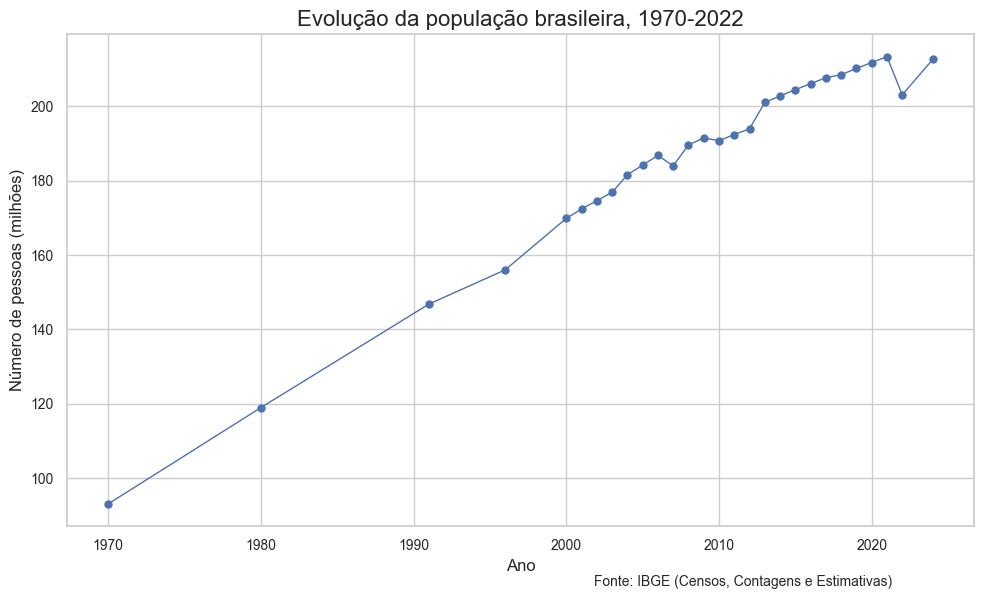

In [ ]:


# Carregar os dados
dados = pd.read_csv("data/populacao_municipios.csv")

# Agrupar por ano e somar o número de pessoas
dados_agrupados = (
    dados.groupby("ano", as_index=False)
    .agg(n_pessoas=("pessoas", "sum"))
)

# Configurar o estilo do gráfico
sns.set_theme(style="whitegrid")

# Criar o gráfico
plt.figure(figsize=(10, 6))
plt.plot(dados_agrupados["ano"], dados_agrupados["n_pessoas"] / 1_000_000, 
         linewidth=1, marker="o", markersize=5)

# Personalizar o gráfico
plt.title("Evolução da população brasileira, 1970-2022", fontsize=16)
plt.xlabel("Ano", fontsize=12)
plt.ylabel("Número de pessoas (milhões)", fontsize=12)
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{x:,.0f}"))  # Formatar os números no eixo Y
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.figtext(0.9, 0.01, "Fonte: IBGE (Censos, Contagens e Estimativas)", fontsize=10, ha="right")

# Exibir o gráfico
plt.tight_layout()
plt.show()
